In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Getting Started</span></b> </div>

**The aim of Employee attrition is as employees leaving their organizations for unpredictable or uncontrollable reasons. Many terms make up attrition, the most common being termination, resignation, planned or voluntary retirement, structural changes, long-term illness, layoffs.**

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Introduction </span></b> </div>

*Employee attrition happens when an employee leaves an organization for any reason and is not replaced for a long time, or not ever. It often results in a decrease in the size of an organization's or department's workforce because positions aren't refilled when employees leave.*

**This is my first machine learning project. since I am beginner I would love to take valuable feedback from you all. hope you like this notebook and learn new things 😊**

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Importing Libraries</span></b> </div>

In [2]:
# Libray for Data Manipulation.
import pandas as pd
import numpy as np

#Library for Data Visualization.
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Loading Dataset</span></b> </div>

In [3]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Data Wrangling</span></b> </div>

1. Computing Dimension of Dataset¶

In [5]:
print("dataset shape: ",df.shape)

dataset shape:  (1470, 35)


2. Statistical Summary of Dataset¶

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


3. Random Sample of dataset with only Numerical Feature

In [8]:
df.select_dtypes(np.number).sample(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
528    50        562                 8          2              1   
527    32        929                10          3              1   
1069   28       1423                 1          3              1   
803    34        697                 3          4              1   
649    53        102                23          4              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
528              723                        2          50               3   
527              722                        4          55               3   
1069            1506                        1          72               2   
803             1115                        3          40               2   
649              901                        4          72               3   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
528          2                3           6796        23452   
527          2                4           5396        21703   
1069         1                3           1563        12530   
803          1                4           2979        22478   
649          4                4          14275        20206   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
528                    3                 14                  3   
527                    1                 12                  3   
1069                   1                 14                  3   
803                    3                 17                  3   
649                    6                 18                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
528                          1             80                 1   
527                          4             80                 0   
1069                         4             80                 1   
803                          4             80                 3   
649                          3             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
528                  18                      4                3   
527                  10                      2                2   
1069                  1                      2                1   
803                   6                      2                3   
649                  33                      0                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
528                4                   3                        1   
527               10                   7                        0   
1069               1                   0                        0   
803                0                   0                        0   
649               12                   9                        3   

      YearsWithCurrManager  
528                      3  
527                      8  
1069                     0  
803                      0  
649                      8

4. Random Sample of dataset with only categorical Feature

In [9]:
df.select_dtypes(include='O').sample(5)

Attrition     BusinessTravel              Department EducationField  \
1374        No      Travel_Rarely                   Sales  Life Sciences   
132        Yes      Travel_Rarely                   Sales  Life Sciences   
742         No      Travel_Rarely  Research & Development  Life Sciences   
148         No      Travel_Rarely  Research & Development  Life Sciences   
1317        No  Travel_Frequently  Research & Development  Life Sciences   

      Gender                JobRole MaritalStatus Over18 OverTime  
1374  Female                Manager       Married      Y      Yes  
132   Female        Sales Executive       Married      Y      Yes  
742     Male  Laboratory Technician       Married      Y       No  
148     Male  Laboratory Technician       Married      Y       No  
1317  Female  Laboratory Technician        Single      Y      Yes

5. Checking if There's Any Duplicate Records.

In [10]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  0


**Observation**
* since there is so difference in yes and no in attrition , our dataset is highlu imbalance
* we

6. Computing Total No. of Missing Values and the Percentage of Missing Values

In [11]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

Total No. of Missing Values  % of Missing Values
Age                                                 0                  0.0
Attrition                                           0                  0.0
BusinessTravel                                      0                  0.0
DailyRate                                           0                  0.0
Department                                          0                  0.0
DistanceFromHome                                    0                  0.0
Education                                           0                  0.0
EducationField                                      0                  0.0
EmployeeCount                                       0                  0.0
EmployeeNumber                                      0                  0.0
EnvironmentSatisfaction                             0                  0.0
Gender                                              0                  0.0
HourlyRate                                          0                  0.0
JobInvolvement                                      0                  0.0
JobLevel                                            0                  0.0
JobRole                                             0                  0.0
JobSatisfaction                                     0                  0.0
MaritalStatus                                       0                  0.0
MonthlyIncome                                       0                  0.0
MonthlyRate                                         0                  0.0
NumCompaniesWorked                                  0                  0.0
Over18                                              0                  0.0
OverTime                                            0                  0.0
PercentSalaryHike                                   0                  0.0
PerformanceRating                                   0                  0.0
RelationshipSatisfaction                            0                  0.0
StandardHours                                       0                  0.0
StockOptionLevel                                    0                  0.0
TotalWorkingYears                                   0                  0.0
TrainingTimesLastYear                               0                  0.0
WorkLifeBalance                                     0                  0.0
YearsAtCompany                                      0                  0.0
YearsInCurrentRole                                  0                  0.0
YearsSinceLastPromotion                             0                  0.0
YearsWithCurrManager                                0                  0.0

8. Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [12]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df.drop(columns=cols, inplace=True)

9 Performing Descriptive Analysis on Categorical Attributes.¶

In [13]:
df.describe(include="O").T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

10. Checking Unique Values of Categorical Attributes.

In [14]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("-"*140)

Unique values of  Attrition {'No', 'Yes'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Sales', 'Research & Development', 'Human Resources'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Other', 'Medical', 'Life Sciences', 'Technical Degree', 'Human Resources', 'Marketing'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Gender {'Female', 'Male'}
---------------------------------------------------------

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Exploratory Data Analysis (EDA)</span></b> </div>

1. Visualizing the Employee Attrition Rate

Text(0.5, 1.0, 'Employee Attrition Rate')

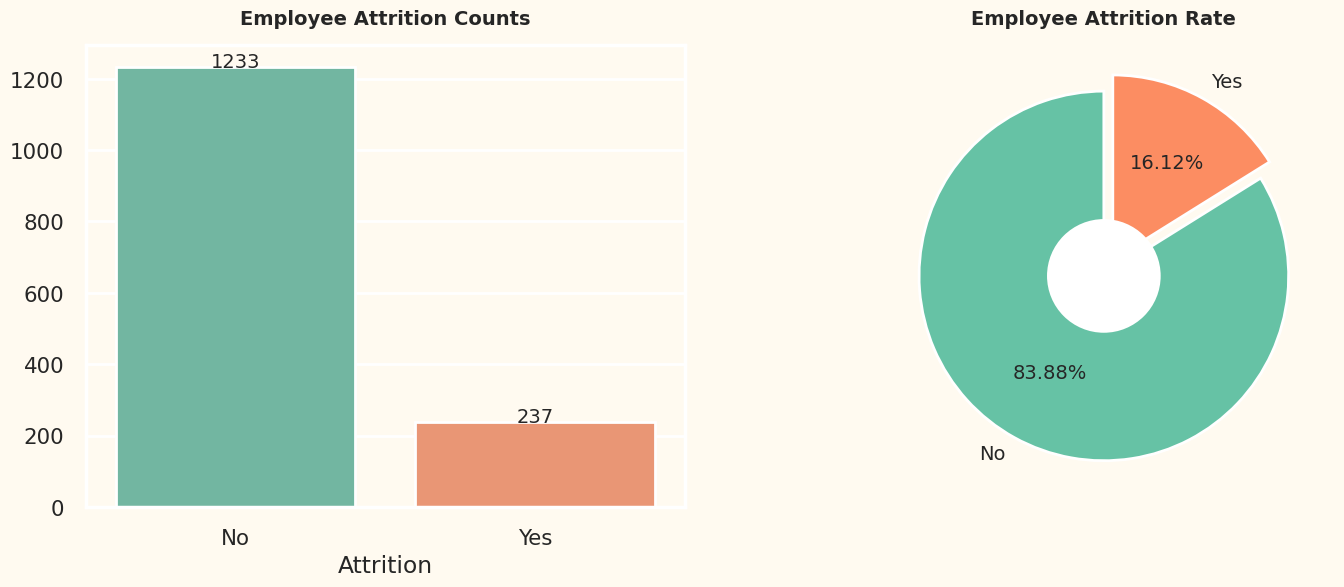

In [15]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)

In [16]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()


2. Analyzing Employee Attrition by Gender.

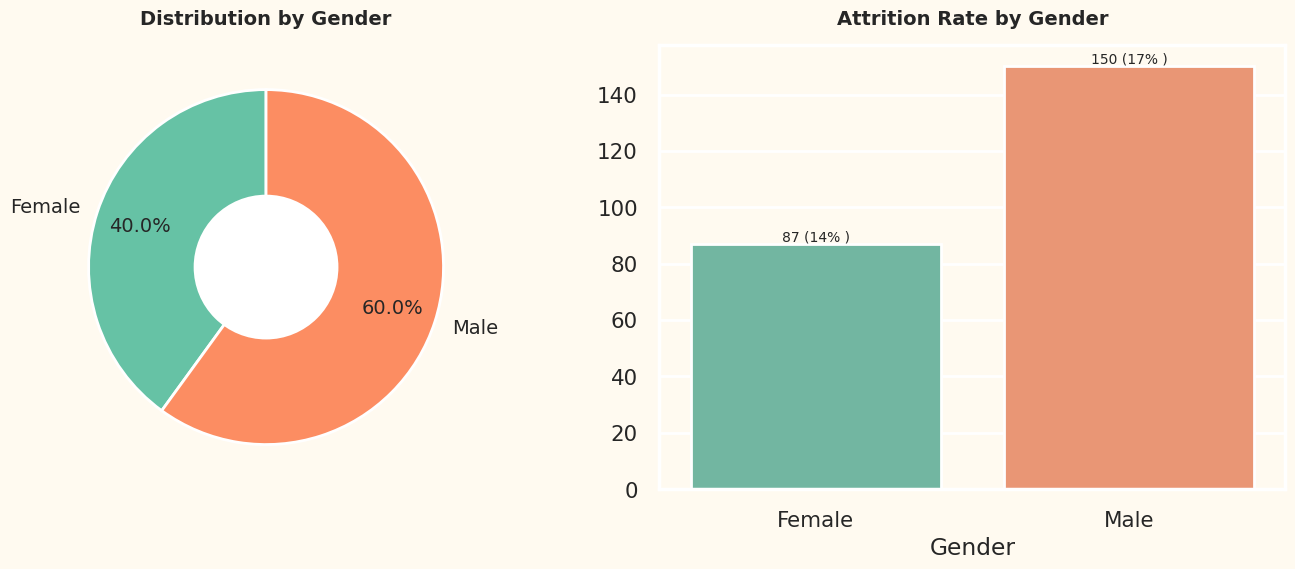

In [17]:
pie_bar_plot(df, 'Gender', 'Attrition')

3. Analyzing Employee Attrition by Marital Statusa

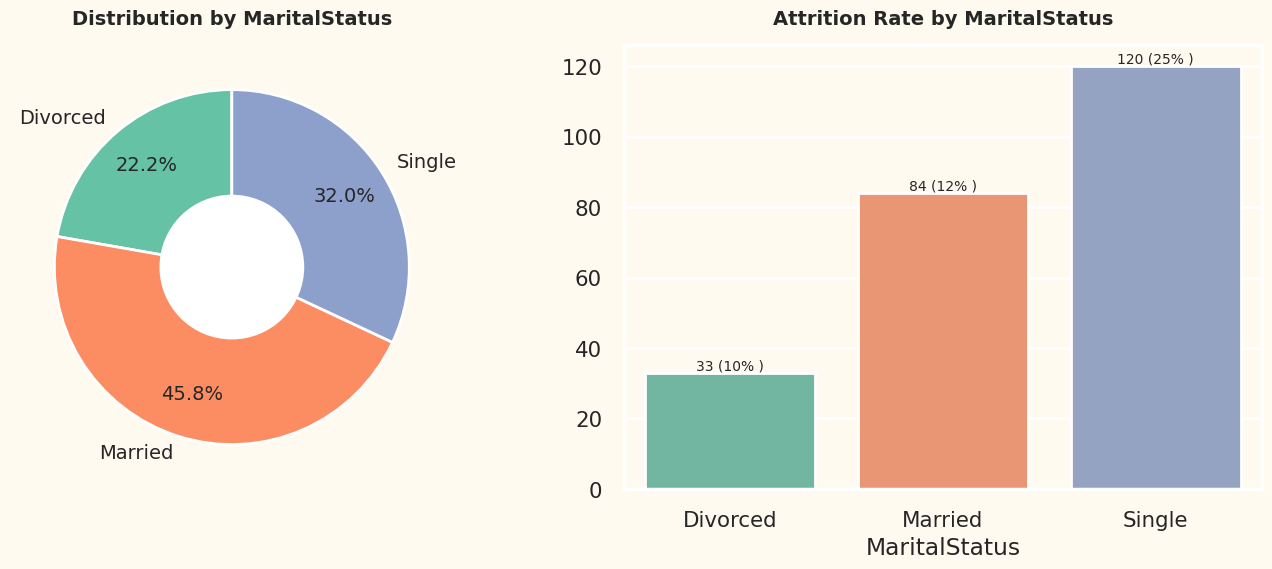

In [18]:
pie_bar_plot(df, 'MaritalStatus', 'Attrition')

4. Analyzing Employee Attrition by Business Travel.

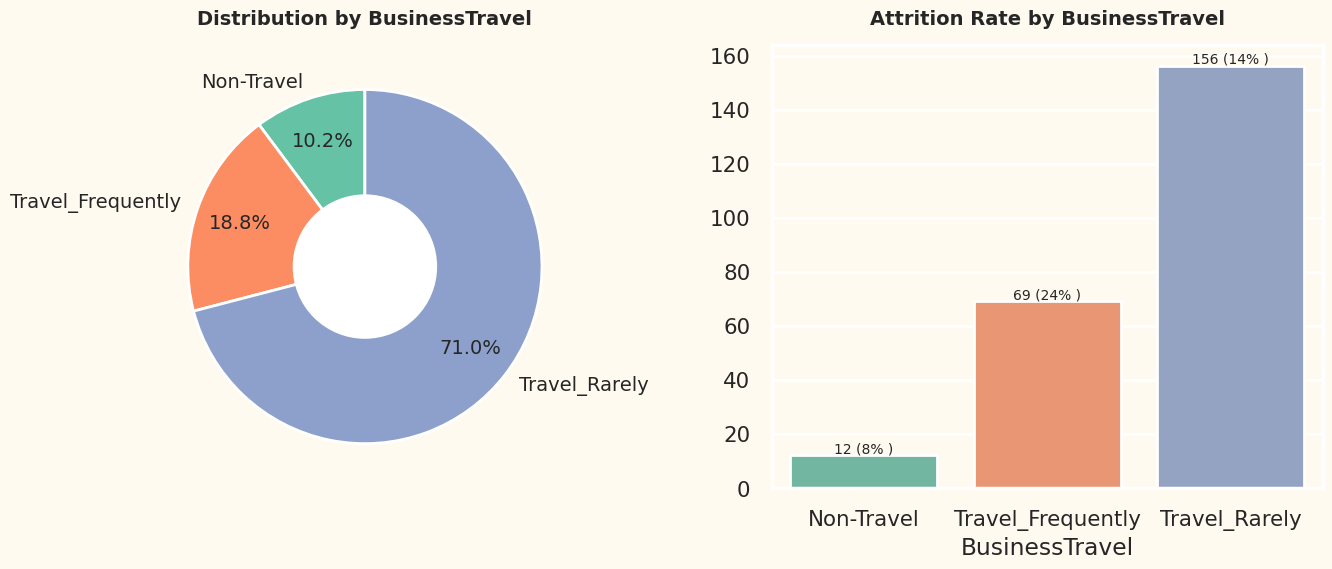

In [19]:
pie_bar_plot(df, 'BusinessTravel', 'Attrition')

5. Analyzing Employee Attrition by Department

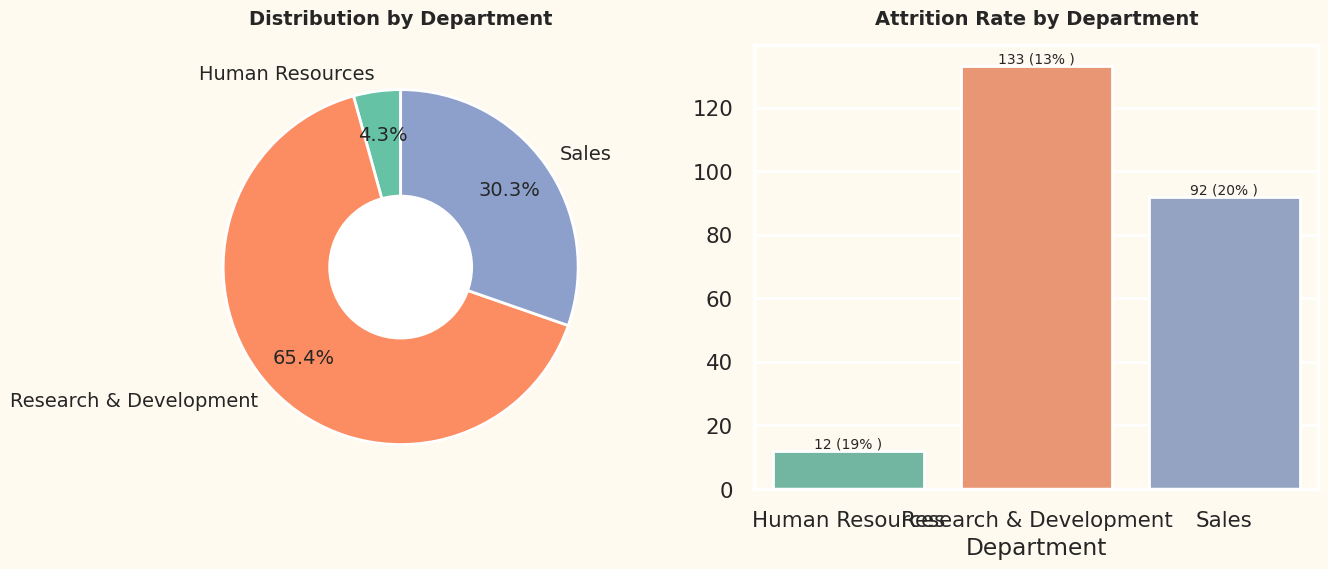

In [20]:
pie_bar_plot(df, 'Department', 'Attrition')

6. Analyzing Employee Attrition by Education.

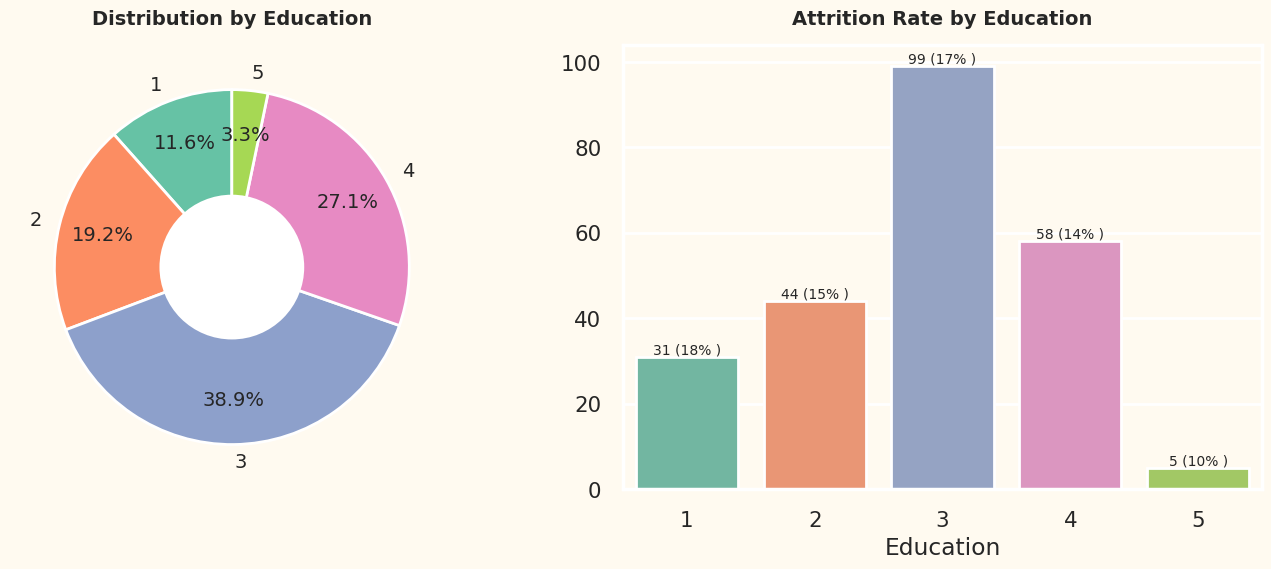

In [21]:
pie_bar_plot(df, 'Education', 'Attrition')

In [22]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

7. Employee Distribution by Age

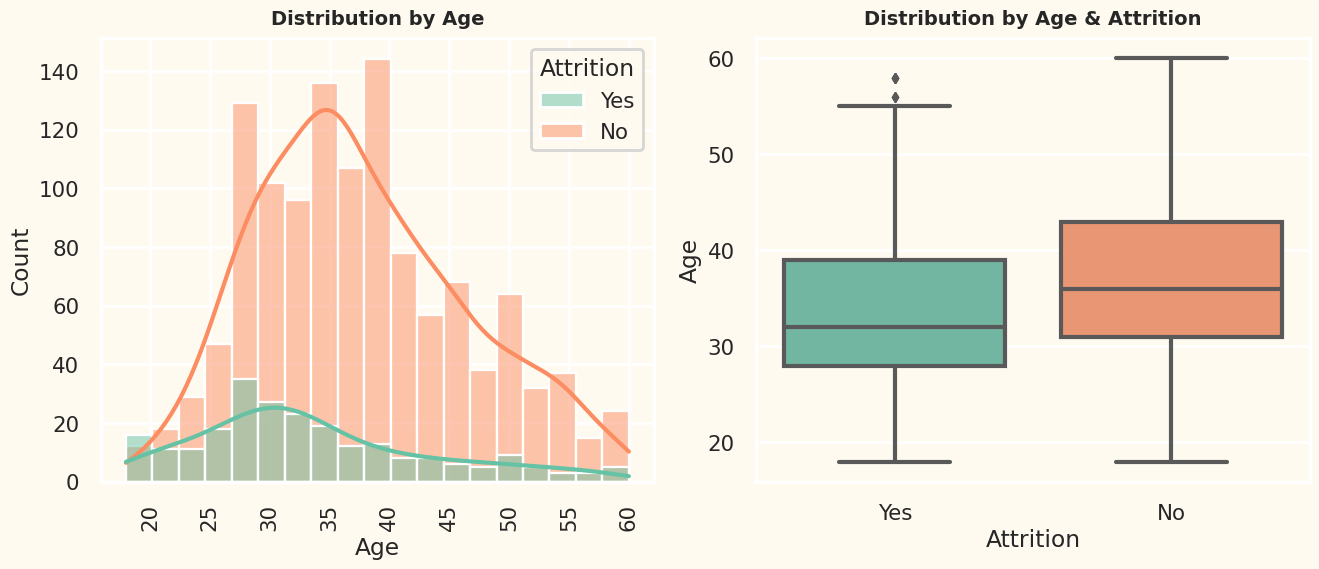

In [23]:
hist_with_hue(df, 'Age', 'Attrition')

In [24]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks( rotation=90)
    plt.tight_layout()
    plt.show()

8. Analyzing Employee Attrition by Education Field

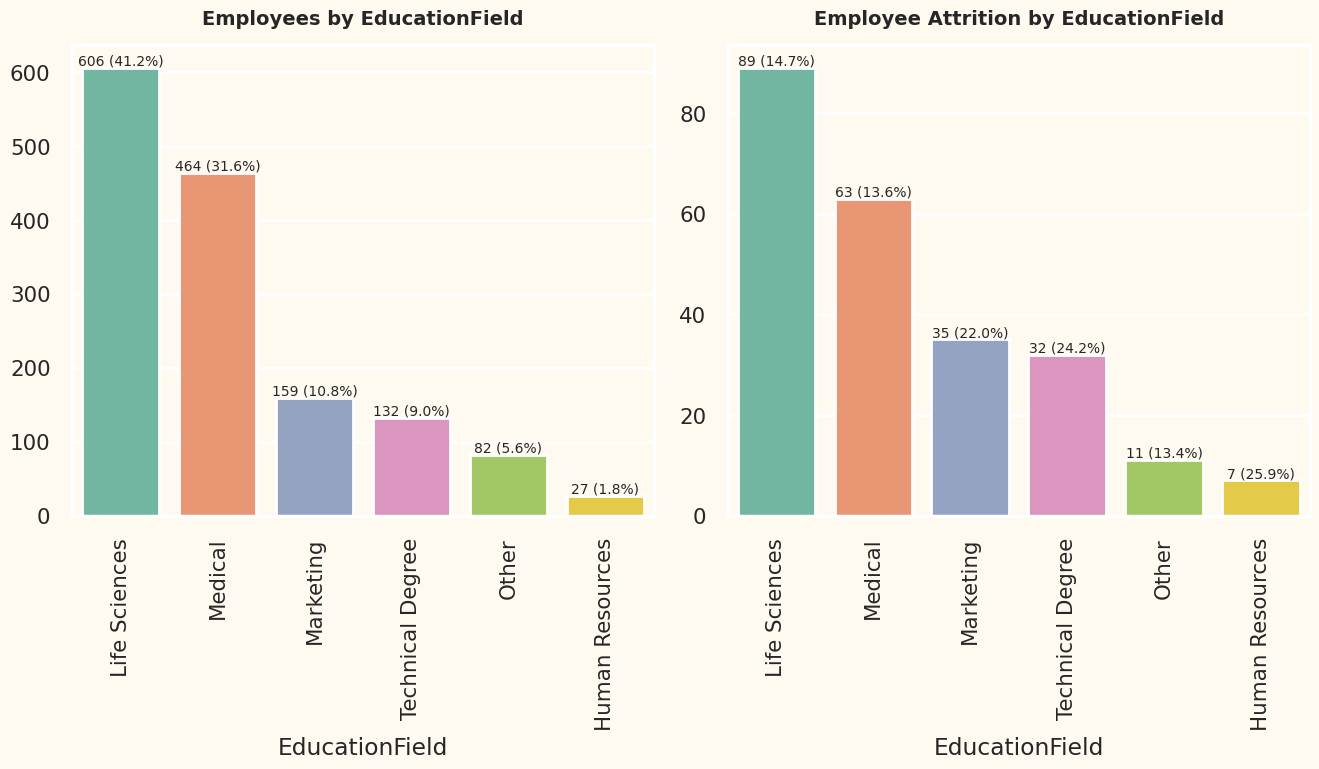

In [25]:
count_percent_plot(df, 'EducationField', 'Attrition')

9. Analyzing Employee Attrition by Environment Satisfaction.

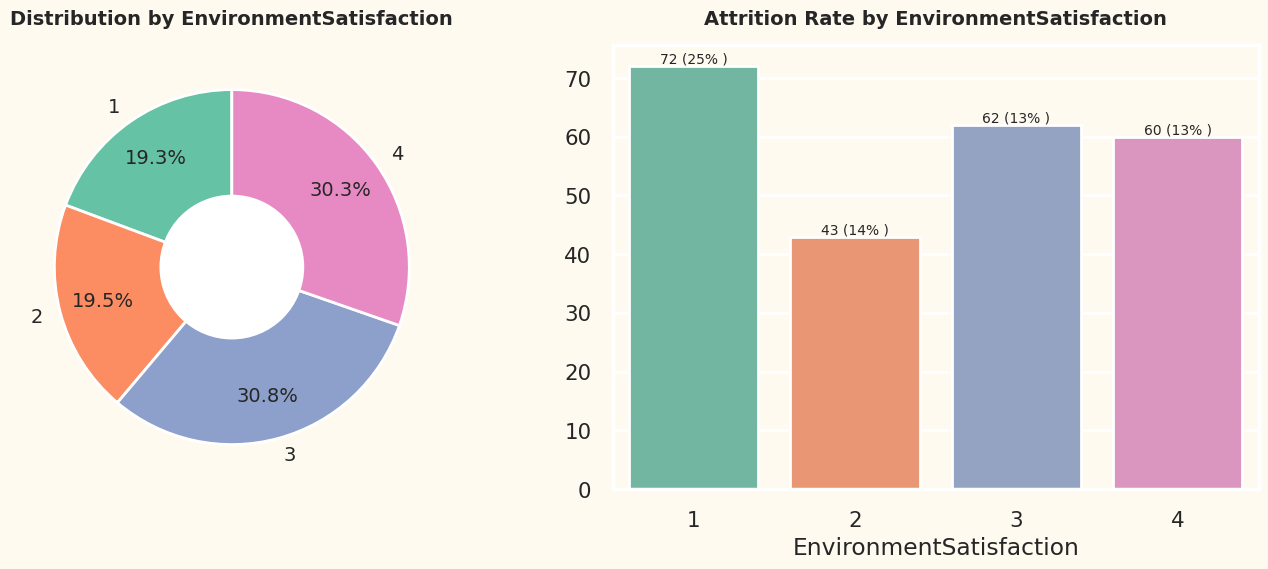

In [26]:
pie_bar_plot(df, 'EnvironmentSatisfaction', 'Attrition')

10. Analyzing Employee Attrition by Job Satisfaction.¶

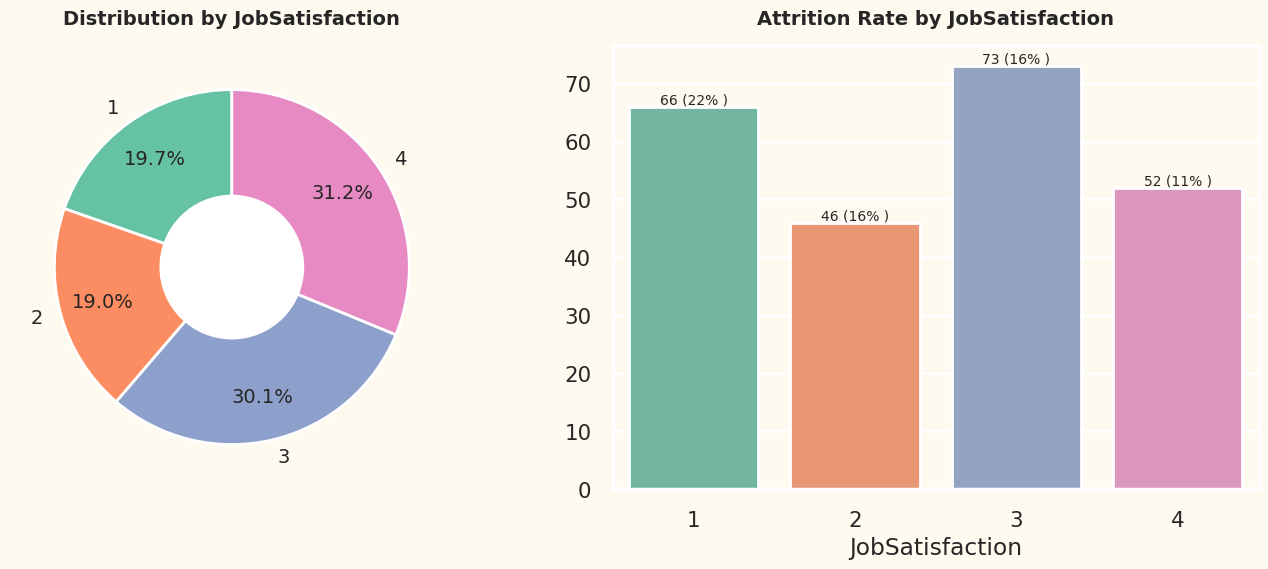

In [27]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

11. Analyzing Employee Attrition by Relationship Satisfaction.

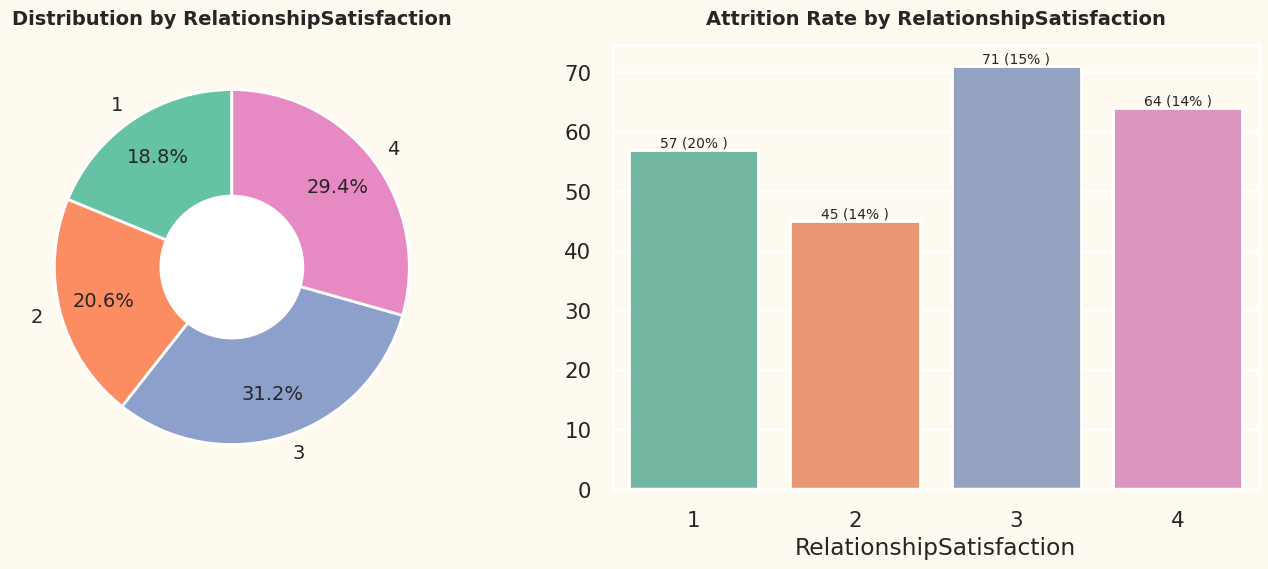

In [28]:
pie_bar_plot(df, 'RelationshipSatisfaction', 'Attrition')

12. Analyzing Employee Attrition by Work Life Balance.

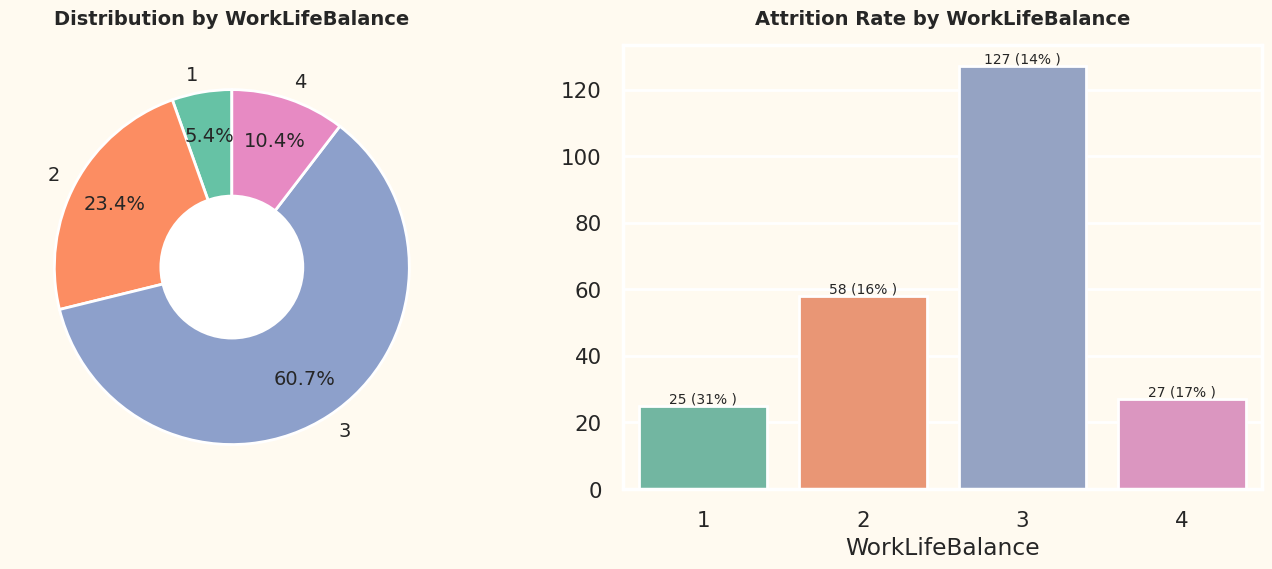

In [29]:
pie_bar_plot(df, 'WorkLifeBalance', 'Attrition')

13. Analyzing Employee Attrition by Performance Rating.

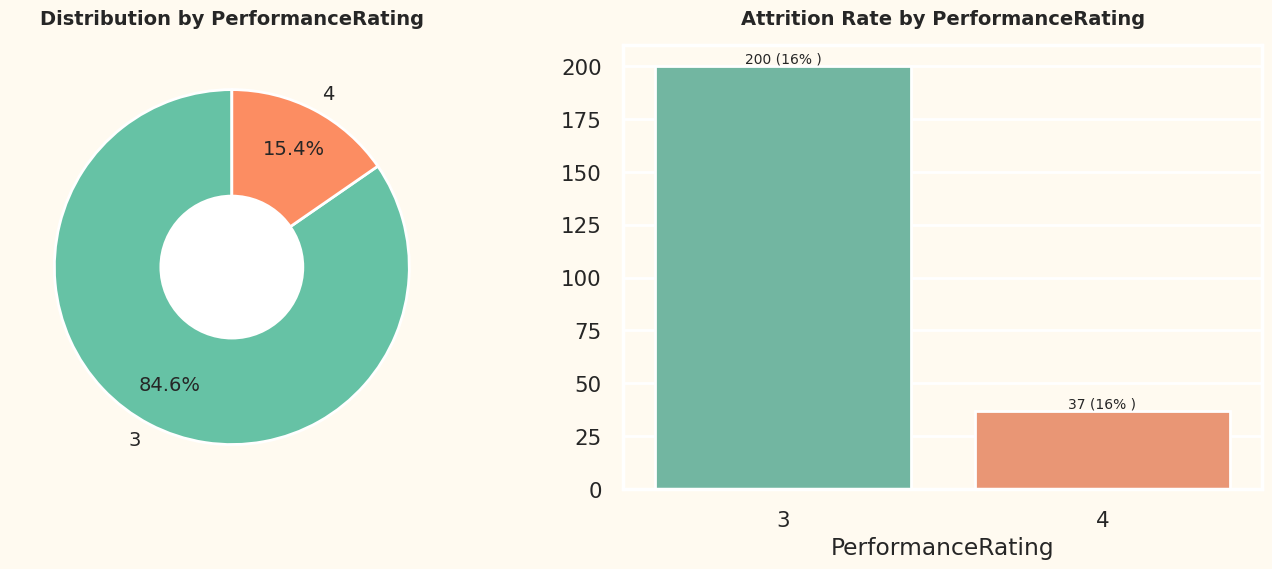

In [30]:
pie_bar_plot(df, 'PerformanceRating', 'Attrition')

14. Analyzing Employee Attrition by Over Time.

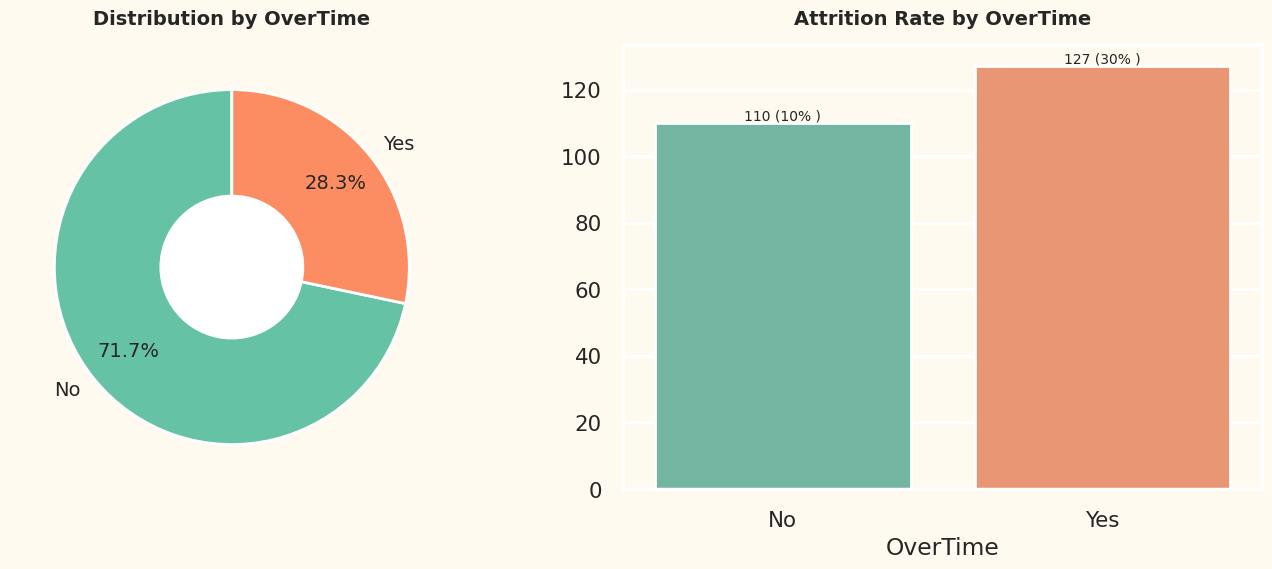

In [31]:
pie_bar_plot(df, 'OverTime', 'Attrition')

15. Analyzing Employee Attrition by Daily Rate.

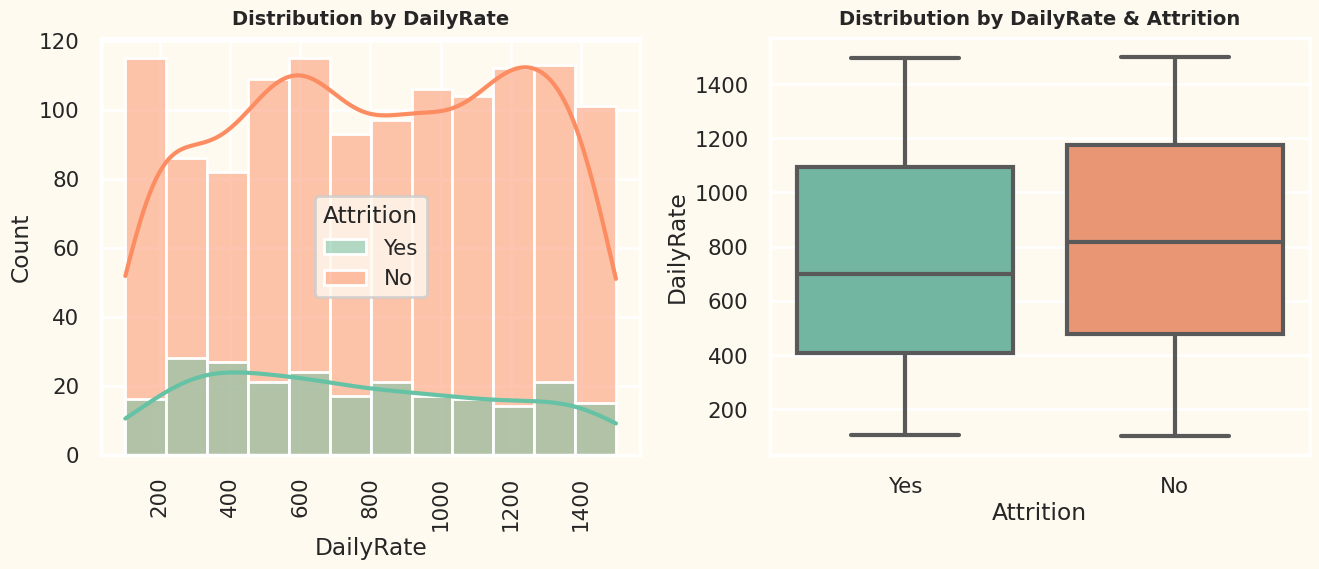

In [32]:
hist_with_hue(df, 'DailyRate', 'Attrition')

16. Analyzing Employee Attrition by Job Roles

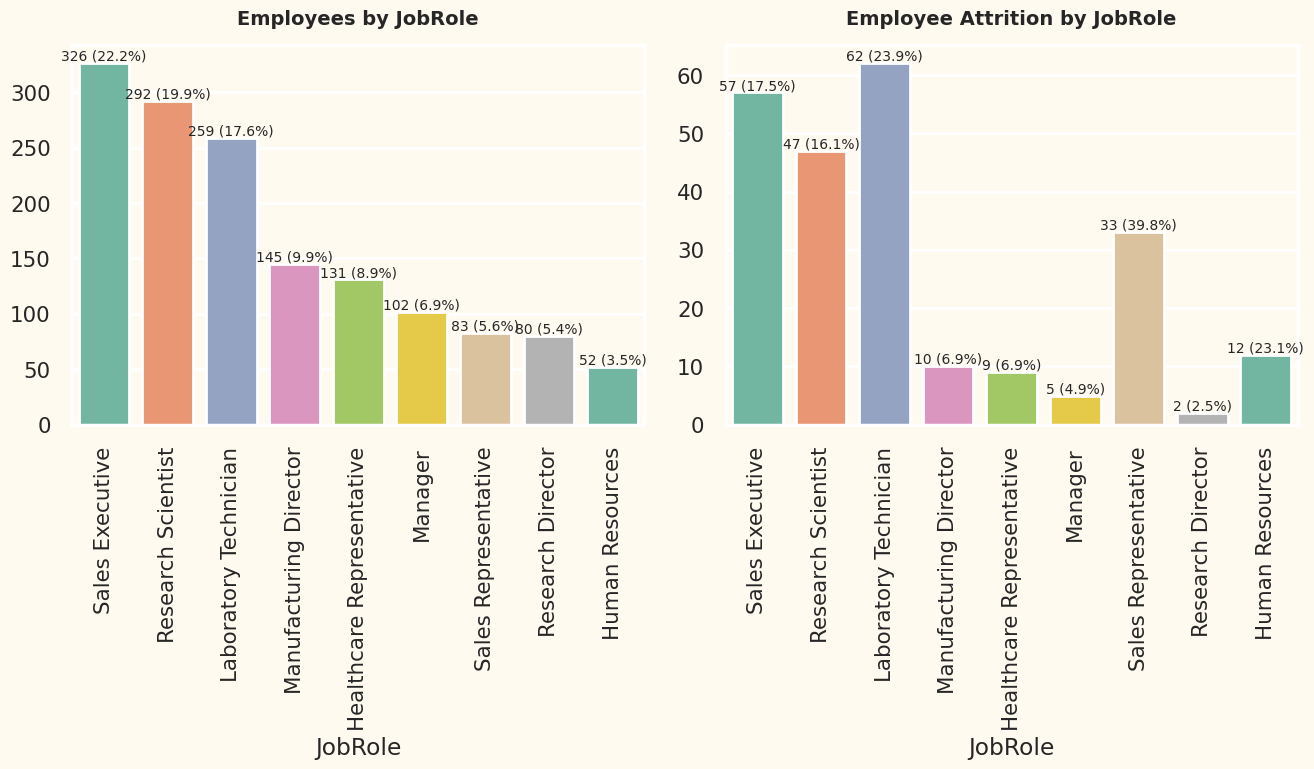

In [33]:
count_percent_plot(df, 'JobRole', 'Attrition')

17. Analyzing Employee Attrition by Job Level.

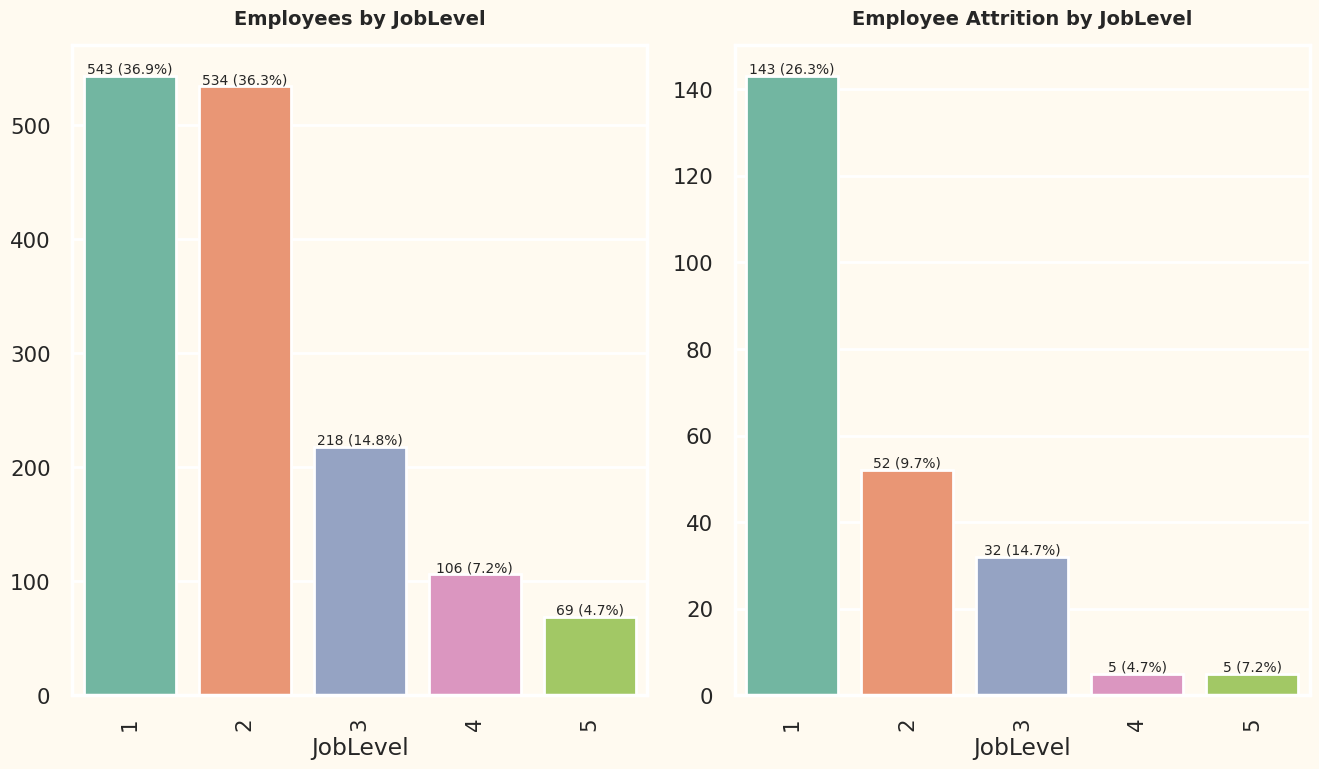

In [34]:
count_percent_plot(df, 'JobLevel', 'Attrition')

18. Analyzing Employee Attrition by Monthly Income.

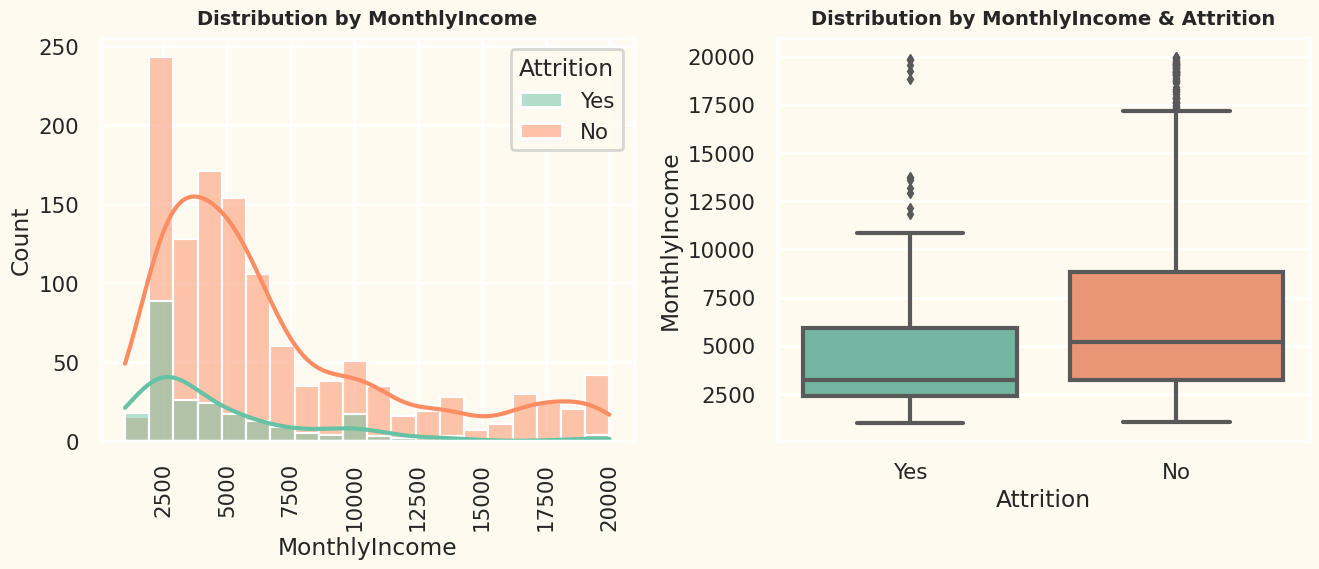

In [35]:
hist_with_hue(df, 'MonthlyIncome', 'Attrition')

19. Analyzing Employee Attrition by Monthly Rate.

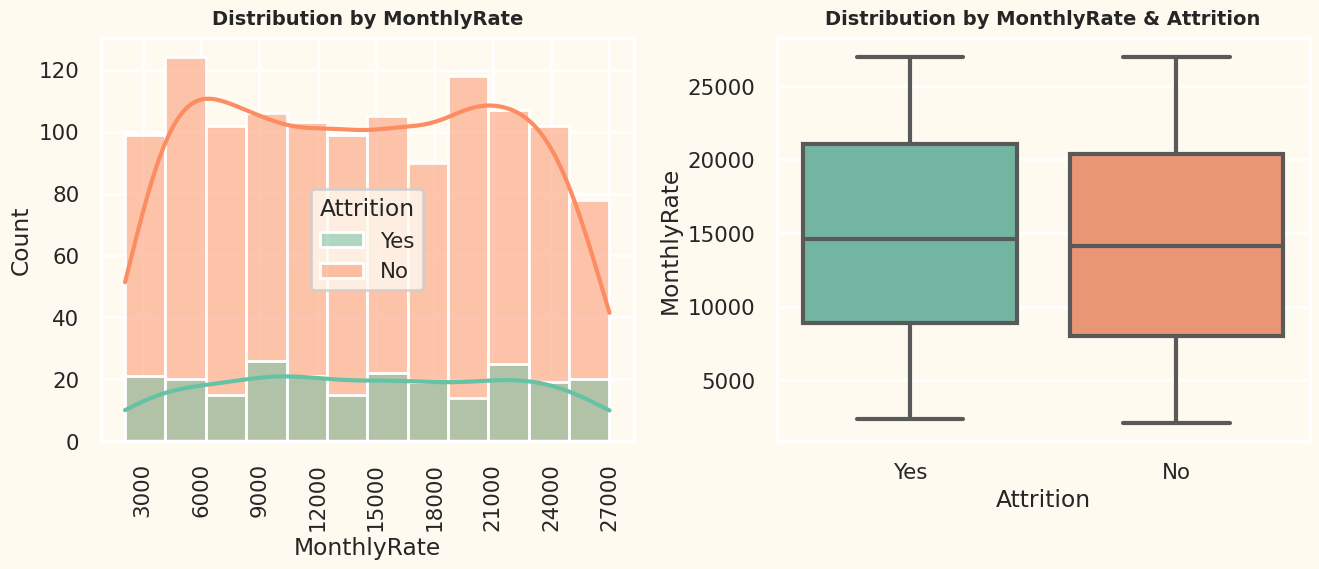

In [36]:
hist_with_hue(df, 'MonthlyRate', 'Attrition')

20. Analyzing Employee Attrition by Distance From Home

In [37]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",df["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 29


In [38]:
df["DistanceFromHome"].describe().to_frame().T

count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1470.0  9.192517  8.106864  1.0  2.0  7.0  14.0  29.0

In [39]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

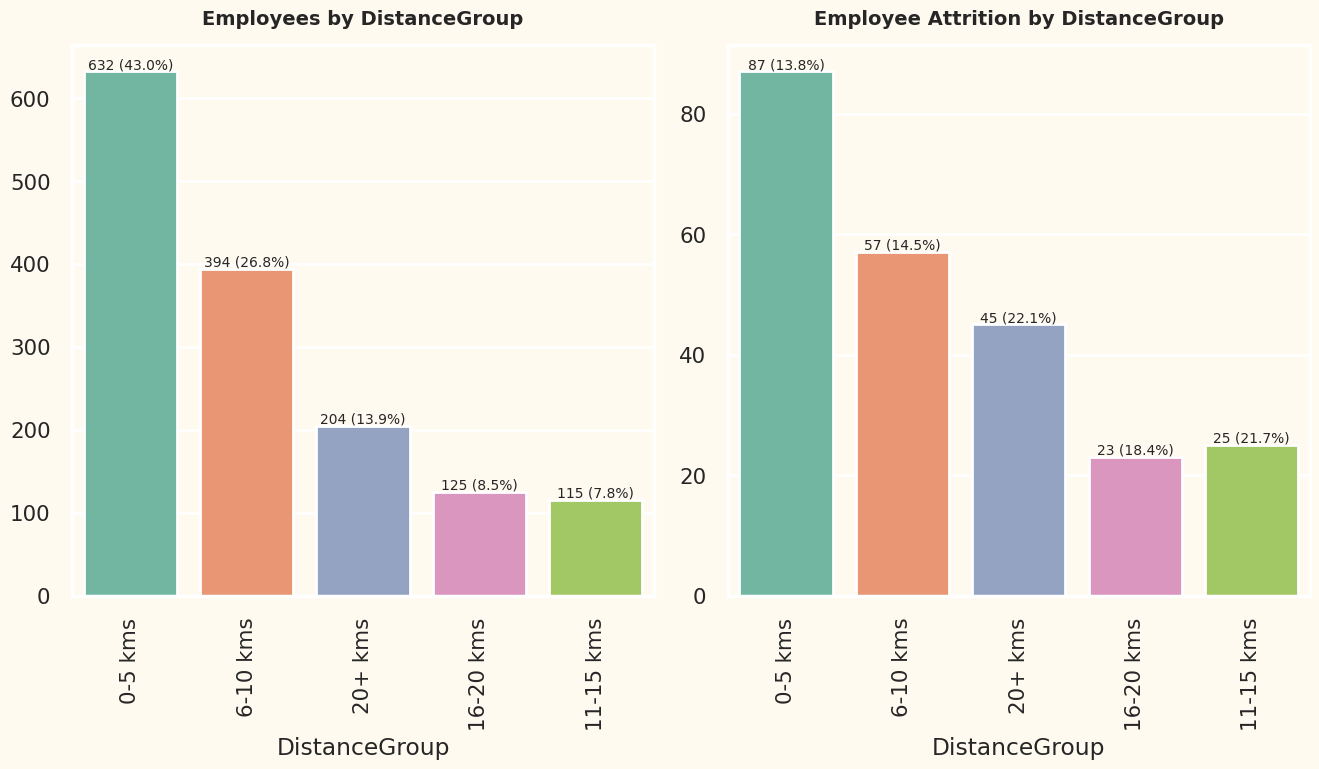

In [40]:
count_percent_plot(df, 'DistanceGroup', 'Attrition')

21 Analyzing Employee Attrition by Number of Companies Worked.

In [41]:
print("Total Unique Values in 'NumCompaniesWorked' Attribute is =>",df["NumCompaniesWorked"].nunique())

Total Unique Values in 'NumCompaniesWorked' Attribute is => 10


In [42]:
df["NumCompaniesWorked"].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1470.0  2.693197  2.498009  0.0  1.0  2.0  4.0  9.0

In [43]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

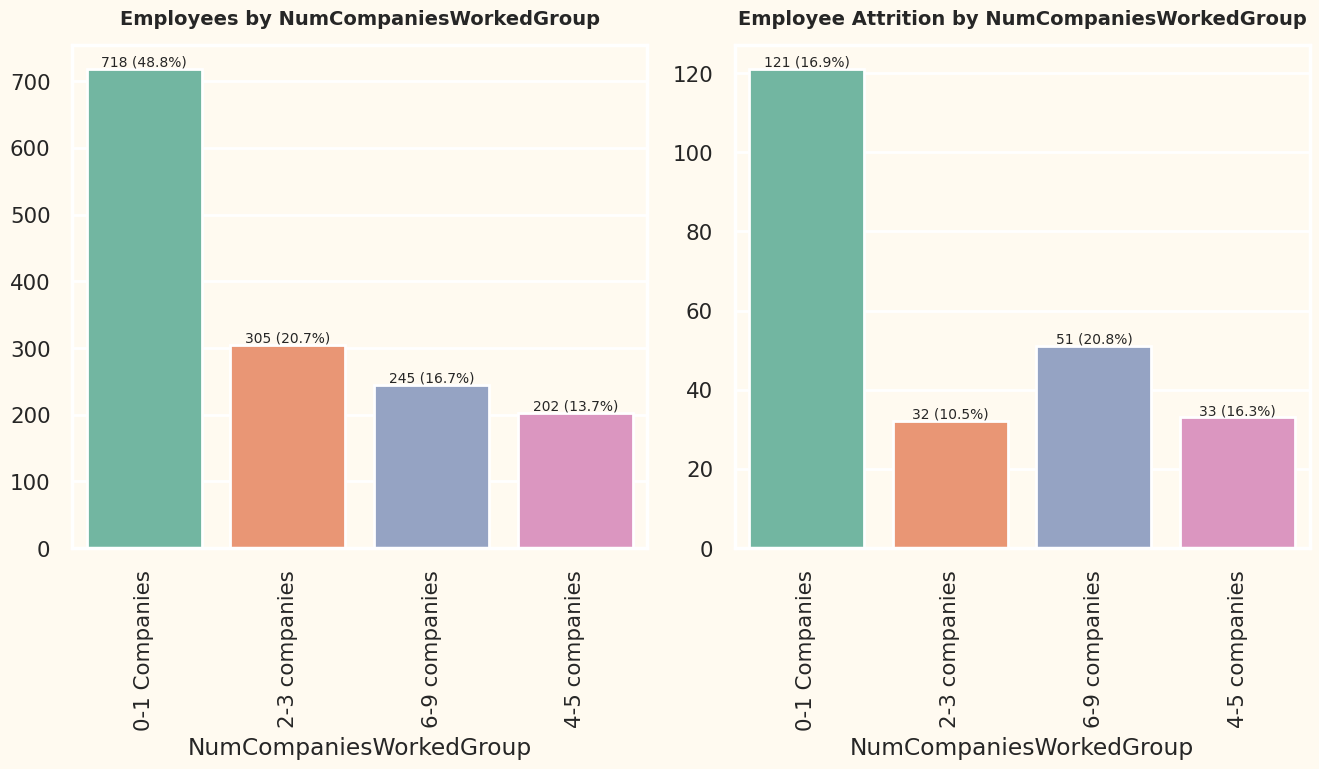

In [44]:
count_percent_plot(df, 'NumCompaniesWorkedGroup', 'Attrition')

22. Analyzing Employee Attrition by Percentage Salary Hike.

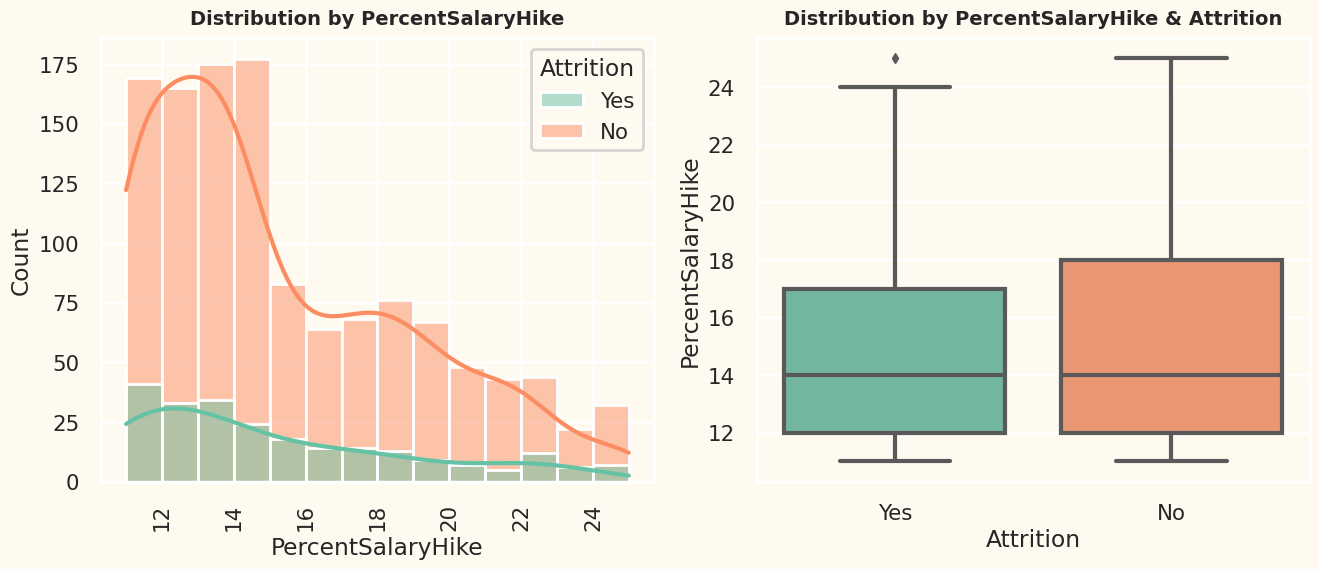

In [45]:
hist_with_hue(df, 'PercentSalaryHike', 'Attrition')

23. Analyzing Employee Attrition by Total Working Years.

In [46]:
print("Total Unique Values in 'TotalWorkingYears' Attribute is =>",df["TotalWorkingYears"].nunique())

Total Unique Values in 'TotalWorkingYears' Attribute is => 40


In [47]:
df["TotalWorkingYears"].describe().to_frame().T

count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1470.0  11.279592  7.780782  0.0  6.0  10.0  15.0  40.0

In [48]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

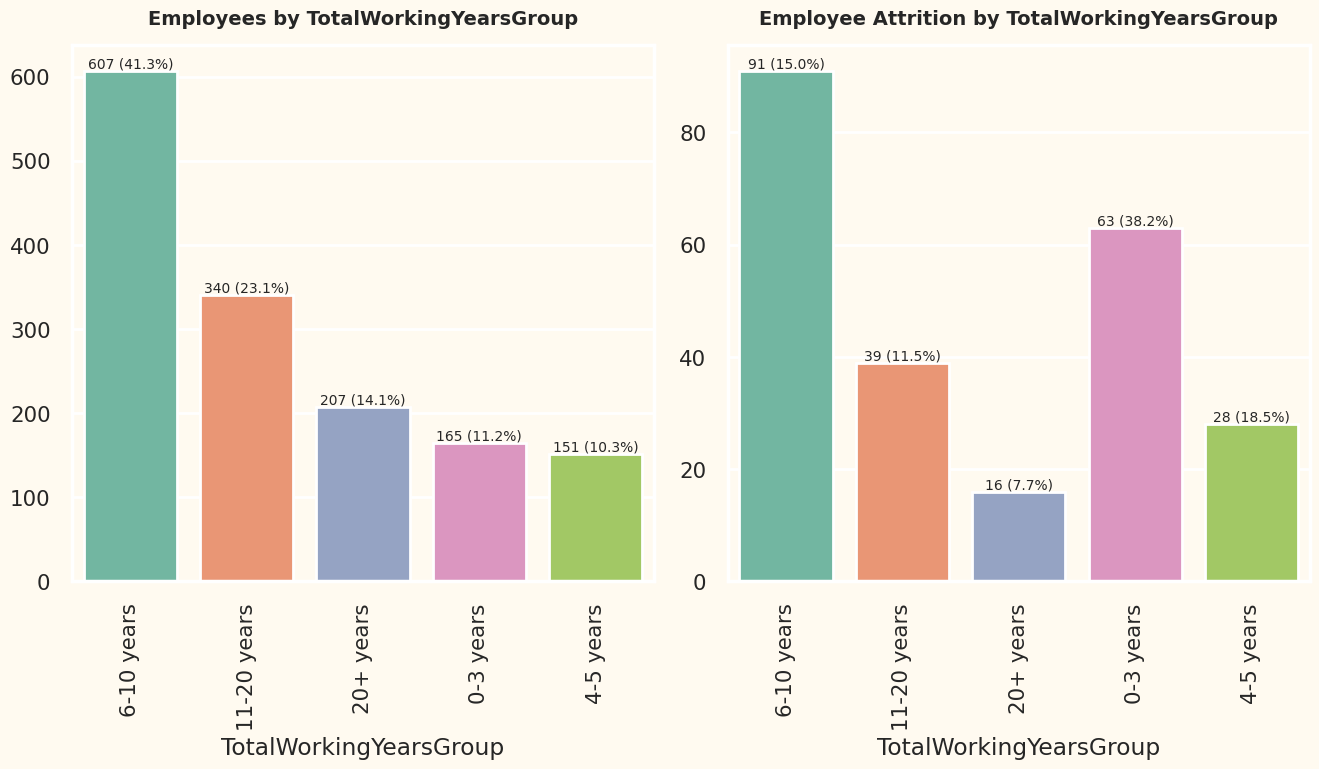

In [49]:
count_percent_plot(df, 'TotalWorkingYearsGroup', 'Attrition')

 ## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Statistical Analysis - Feature Importance</span></b> </div>

1. Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

In [50]:
num_cols = df.select_dtypes(np.number).columns

In [51]:
new_data = df.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [52]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

Visualizing the F_Score of ANOVA Test of Each Numerical features.¶

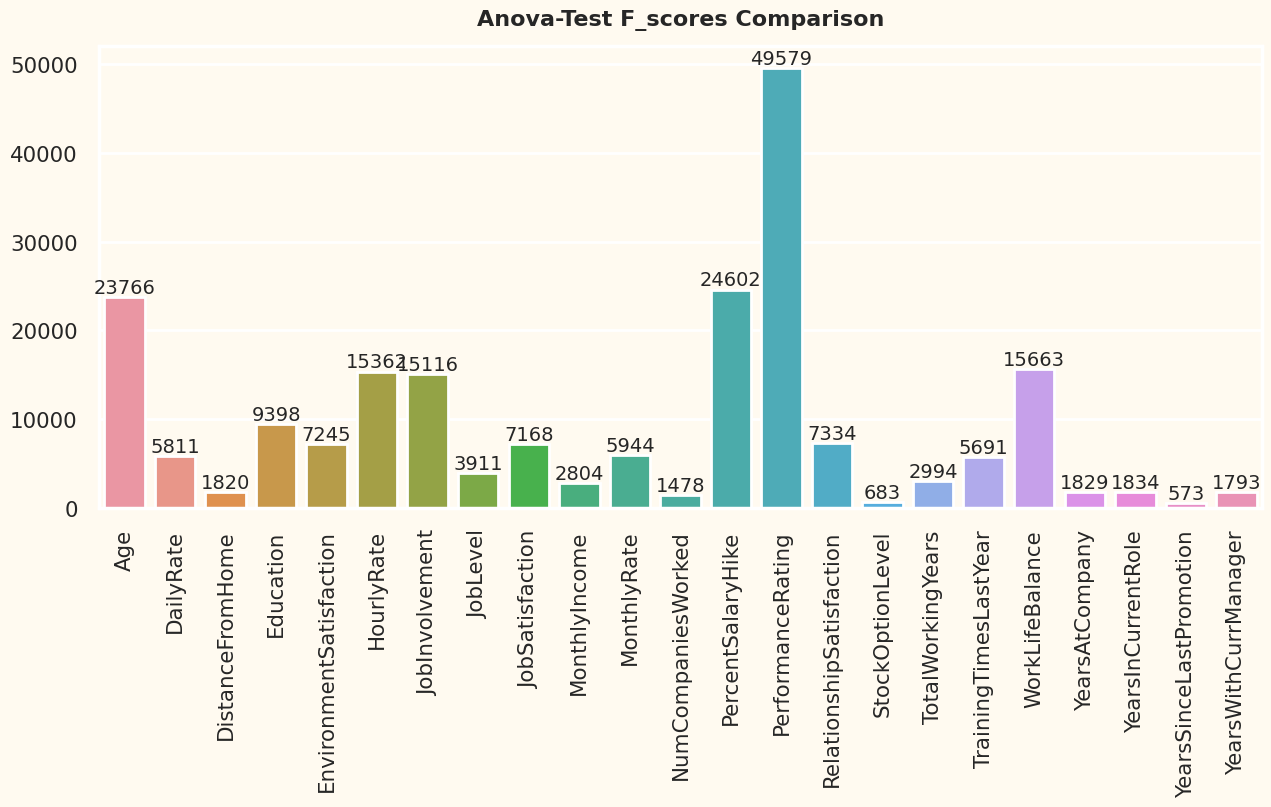

In [53]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

Comparing F_Score and P_value of ANOVA Test.¶

In [54]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

Features       F_Score                 P_value
0                        Age  23766.934042  0.00000000000000000000
1                  DailyRate   5811.796569  0.00000000000000000000
2           DistanceFromHome   1820.614585  0.00000000000000000000
3                  Education   9398.987566  0.00000000000000000000
4    EnvironmentSatisfaction   7245.704914  0.00000000000000000000
5                 HourlyRate  15362.122371  0.00000000000000000000
6             JobInvolvement  15116.579563  0.00000000000000000000
7                   JobLevel   3911.331585  0.00000000000000000000
8            JobSatisfaction   7168.703089  0.00000000000000000000
9              MonthlyIncome   2804.459632  0.00000000000000000000
10               MonthlyRate   5944.089071  0.00000000000000000000
11        NumCompaniesWorked   1478.188633  0.00000000000000000000
12         PercentSalaryHike  24602.507947  0.00000000000000000000
13         PerformanceRating  49579.088833  0.00000000000000000000
14  RelationshipSatisfaction   7334.250922  0.00000000000000000000
15          StockOptionLevel    683.069576  0.00000000000000000000
16         TotalWorkingYears   2994.906310  0.00000000000000000000
17     TrainingTimesLastYear   5691.401732  0.00000000000000000000
18           WorkLifeBalance  15663.161434  0.00000000000000000000
19            YearsAtCompany   1829.442766  0.00000000000000000000
20        YearsInCurrentRole   1834.262264  0.00000000000000000000
21   YearsSinceLastPromotion    573.896430  0.00000000000000000000
22      YearsWithCurrManager   1793.291314  0.00000000000000000000

2. Performing Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition.

In [55]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [56]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

Visualizing the Chi-Square Statistic Values of Each Categorical Features.

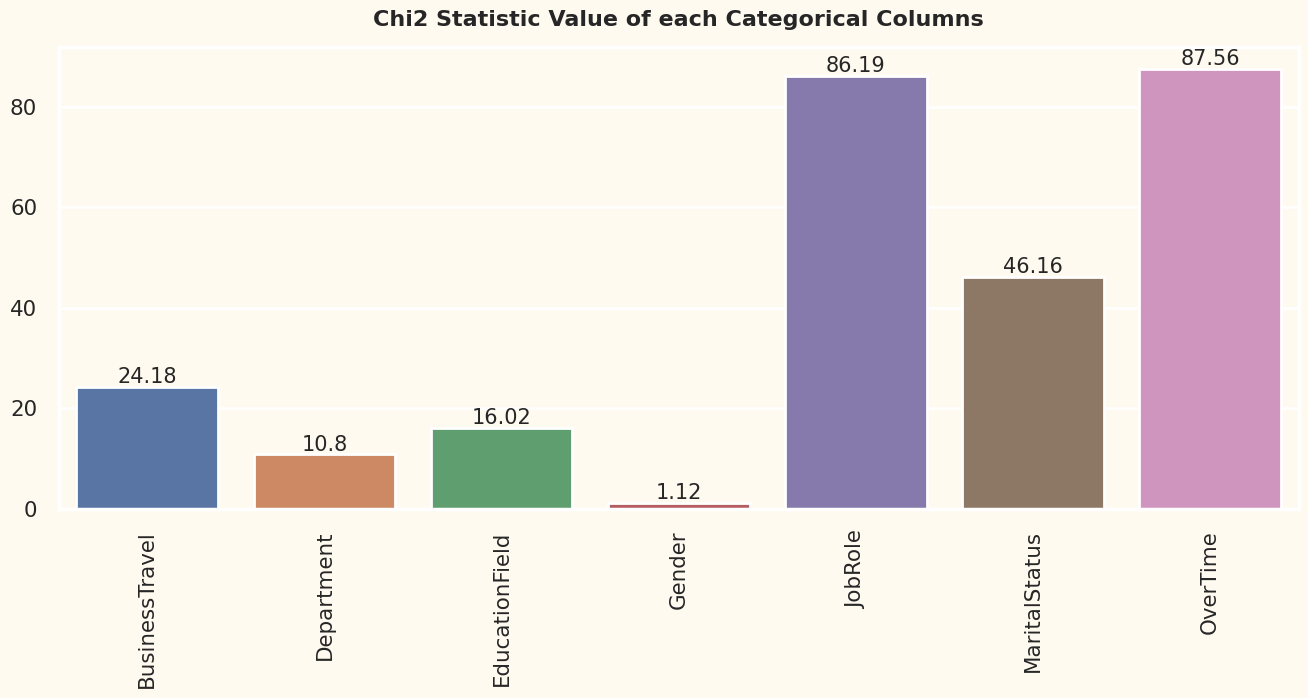

In [57]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

Compairing Chi2_Statistic and P_value of Chi_Square Test.

In [58]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

Features  Chi_2 Statistic                 P_value
0  BusinessTravel        24.182414  0.00000560861447644993
1      Department        10.796007  0.00452560657447963286
2  EducationField        16.024674  0.00677398013902521211
3          Gender         1.116967  0.29057244902890855265
4         JobRole        86.190254  0.00000000000000275248
5   MaritalStatus        46.163677  0.00000000009455511060
6        OverTime        87.564294  0.00000000000000000001

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Encoding</span></b> </div>

In [59]:
# droping the columns which we have created for analysis purpose
cols = ["DistanceGroup", "NumCompaniesWorkedGroup", "TotalWorkingYearsGroup"]
df.drop(columns=cols, inplace=True)

In [60]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [61]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

Label Encoding for remaining Categorical Columns

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [63]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [64]:
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

In [65]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [66]:
df = pd.concat([df,encoded_df],axis=1)

In [67]:
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Correlation Matrix</span></b> </div>

<Axes: title={'center': 'Correlation Plot'}>

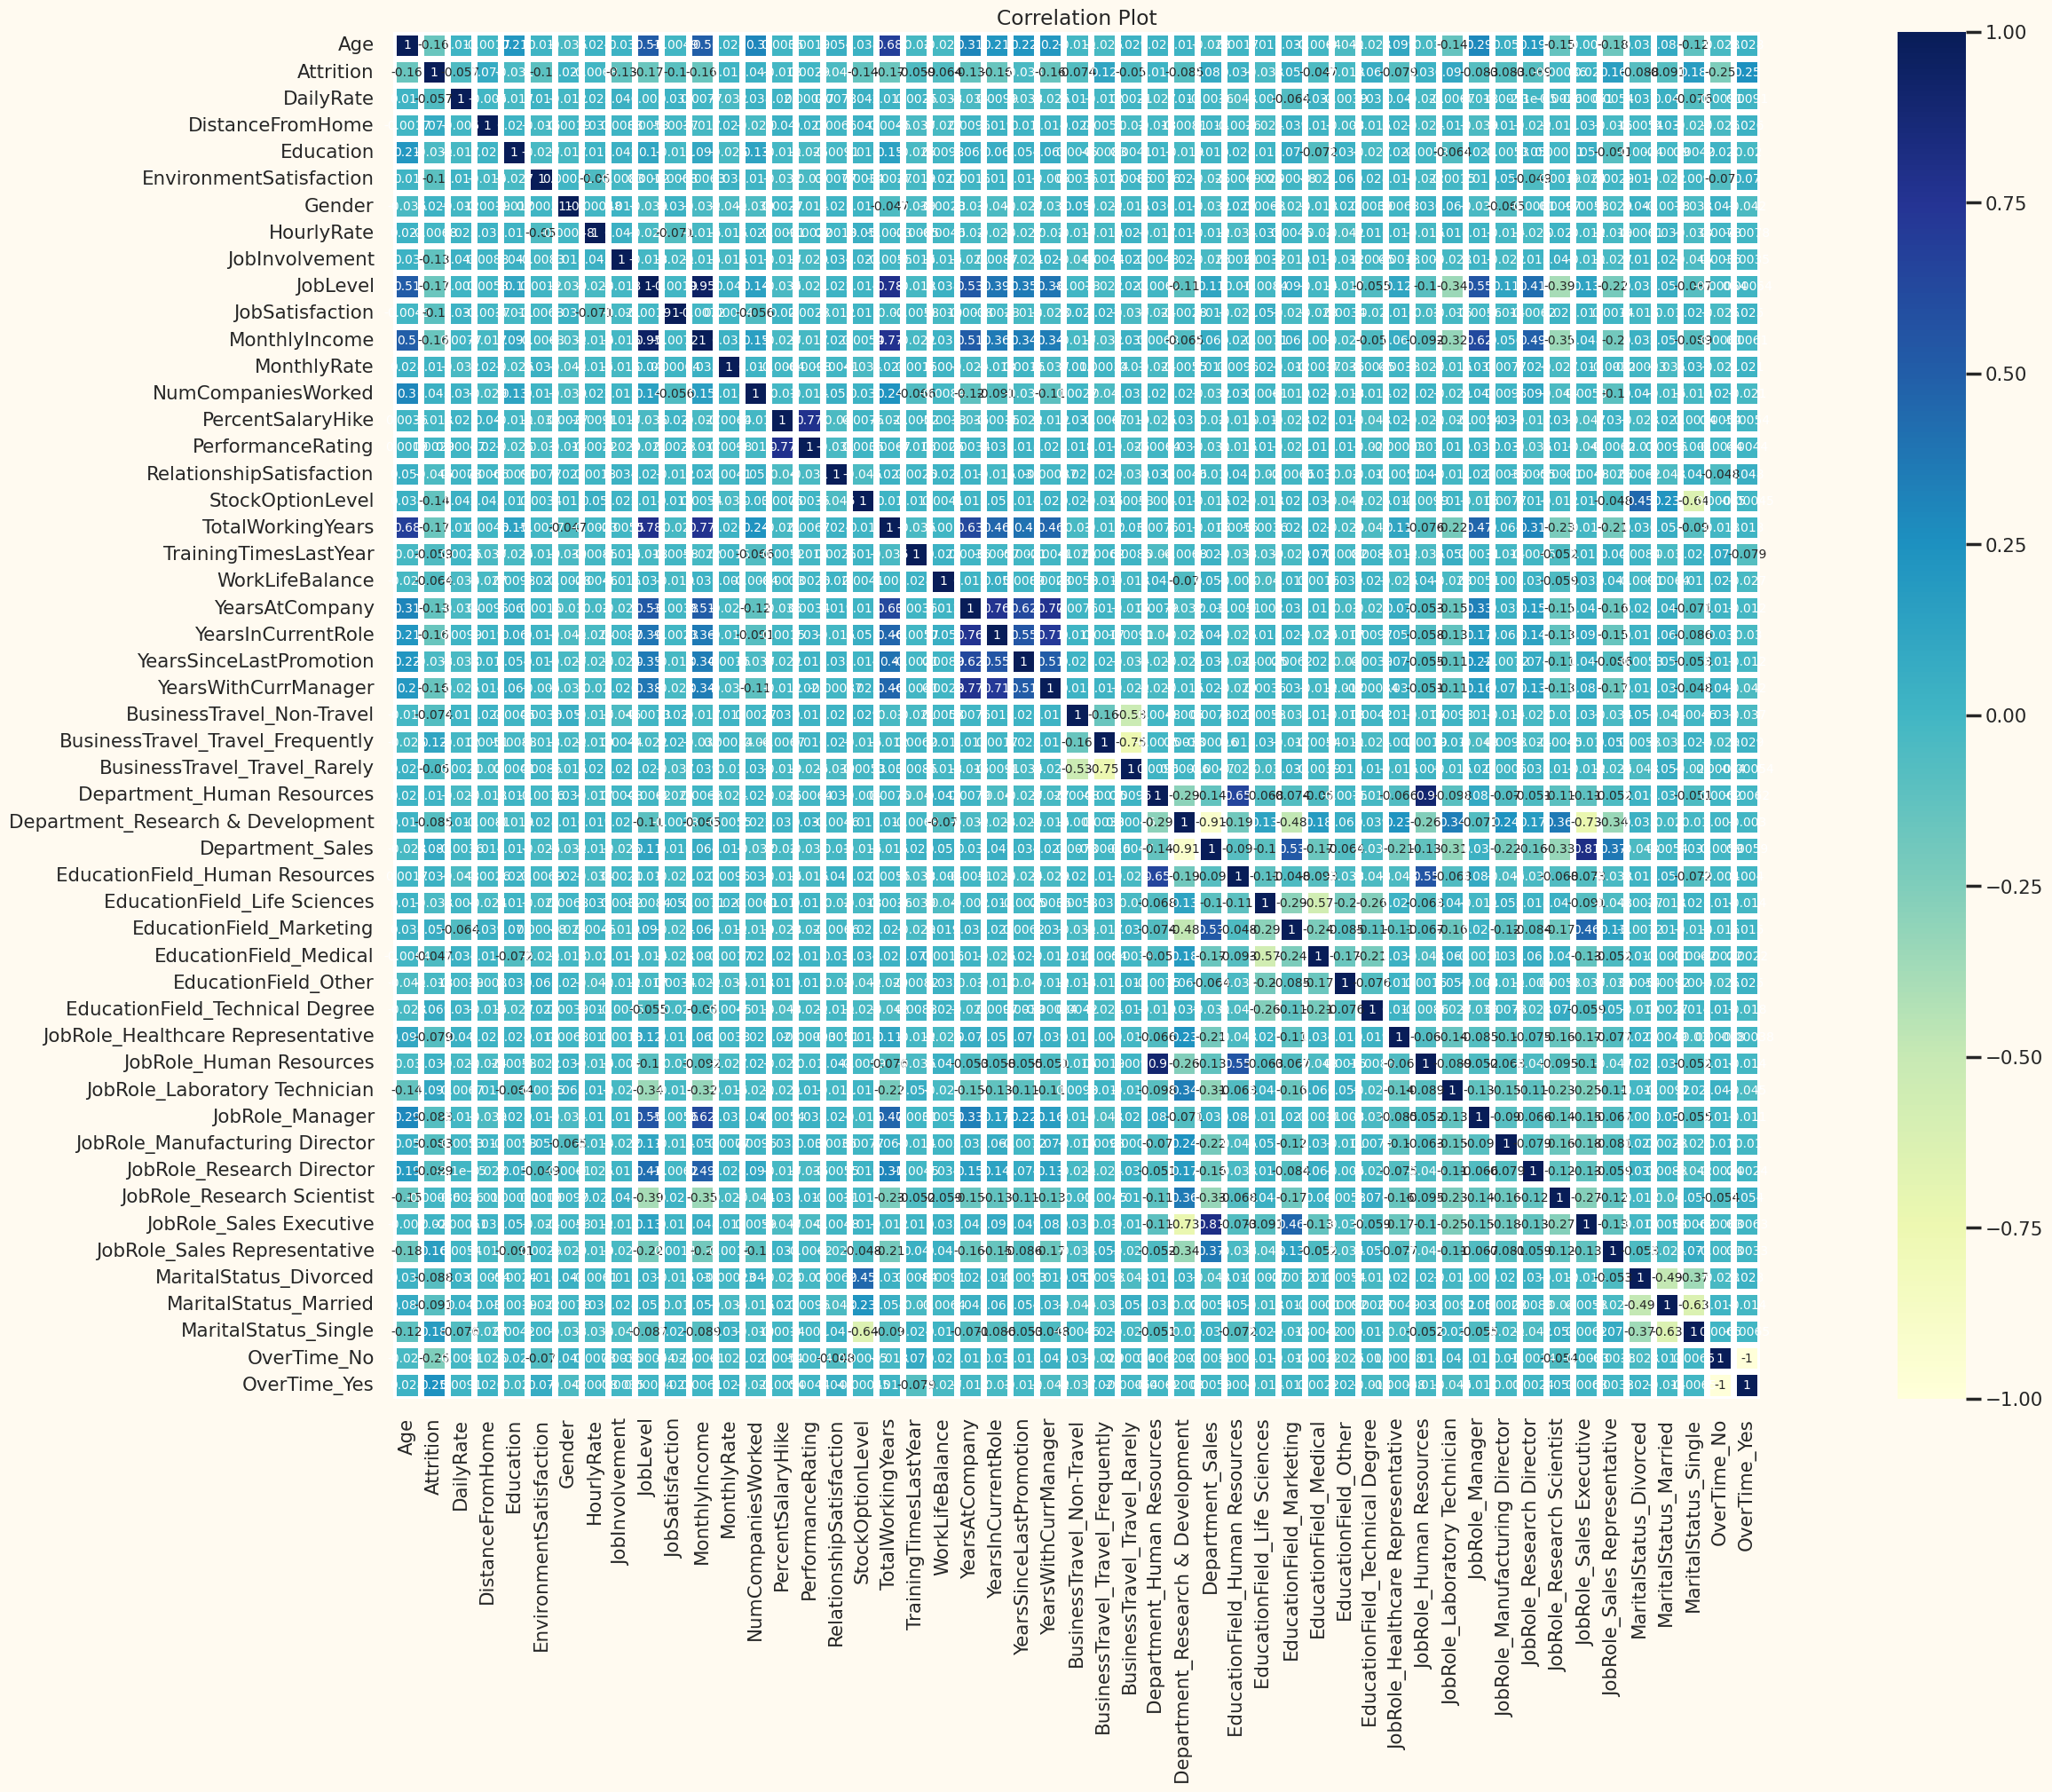

In [69]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [70]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [71]:
# droping columns which are highly correlated

cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df.drop(columns=cols, inplace=True)


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Check the Imbalance in the Dataset</span></b> </div>

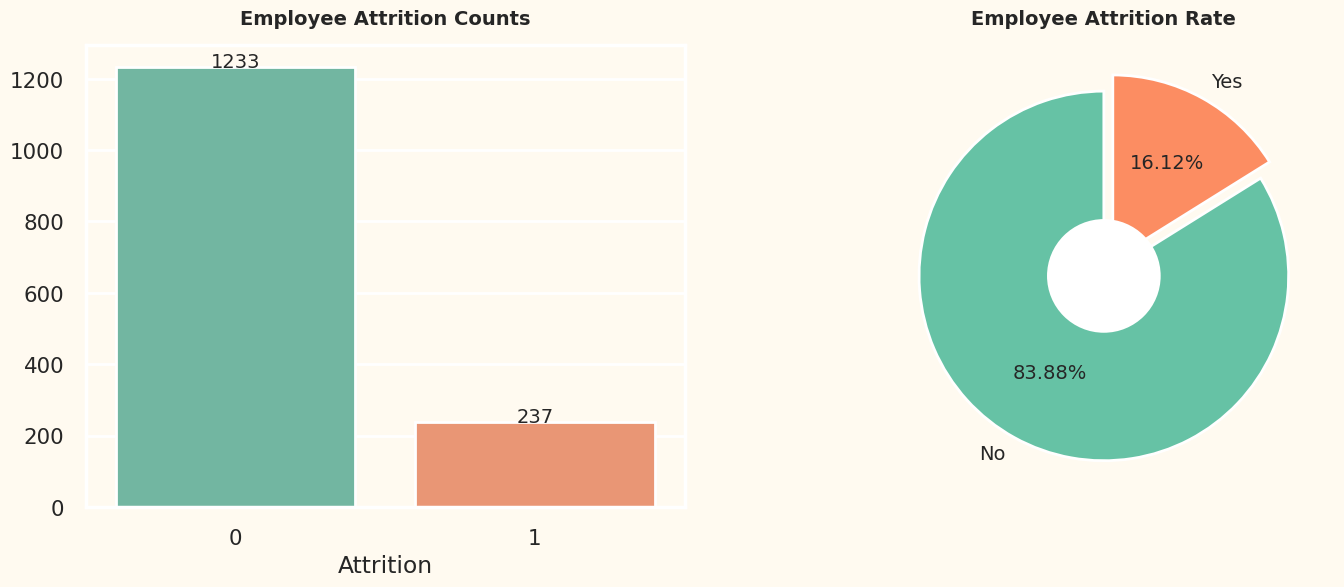

In [72]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Split the Data into Independent and Dependent Variable</span></b> </div>

In [73]:
x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Balance the Dataset using SMOTE</span></b> </div>


In [74]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0            1233
1             237
Name: count, dtype: int64

After Smoote Attrition
0            1233
1            1233
Name: count, dtype: int64



## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Feature Scaling</span></b> </div>


In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [76]:
x_scaled = scaler.fit_transform(x_smote)


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Split the Data into Training and Test</span></b> </div>



## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Split the Data into Training and Test (UnScaled)</span></b> </div>


In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Split the Data into Training and Test (scaled)</span></b> </div>


In [78]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [79]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve

2024-06-06 05:24:48.151312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 05:24:48.151490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 05:24:48.313551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Baseline Model Building</span></b> </div>


In [80]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Model Building for Scaled Data</span></b> </div>


In [81]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    f = f1_score(y_test1,x_test_pred1)
    g = cohen_kappa_score(y_test1, x_test_pred1)
    h = balanced_accuracy_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"ROC_AUC Score of {model} model is:", e)
    print(f"f1 Score of {model} model is:", f)
    print(f"kappa Score of {model} model is:", g)
    print(f"G_mean Score of {model} model is:", h)
 
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 1. Linear Regressor Model</span></b> </div>


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 85.44624746450305
Accuracy_Score of LogisticRegression() model on Testing Data is: 84.0080971659919
Precision Score of LogisticRegression() model is: 0.8481012658227848
Recall Score of LogisticRegression() model is: 0.8237704918032787
ROC_AUC Score of LogisticRegression() model is: 0.9106557377049181
f1 Score of LogisticRegression() model is: 0.8357588357588357
kappa Score of LogisticRegression() model is: 0.6800045917446991
G_mean Score of LogisticRegression() model is: 0.8398852459016393

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       250
           1       0.85      0.82      0.84       244

    accuracy                           0.84       494
   macro avg     

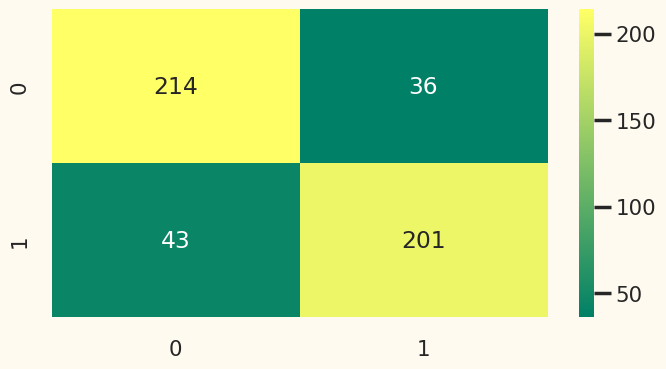


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


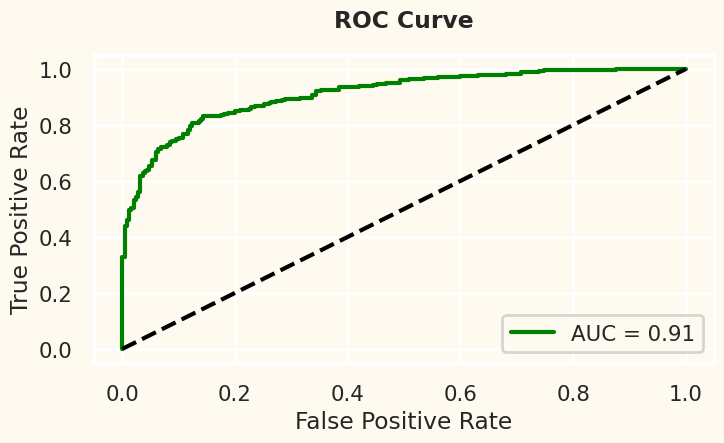

In [82]:
model_prediction(LogisticRegression())

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 2. K Nearest Neighbors(KNN)</span></b> </div>


------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 90.87221095334685
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 87.85425101214574
Precision Score of KNeighborsClassifier() model is: 0.8087248322147651
Recall Score of KNeighborsClassifier() model is: 0.9877049180327869
ROC_AUC Score of KNeighborsClassifier() model is: 0.9609344262295082
f1 Score of KNeighborsClassifier() model is: 0.88929889298893
kappa Score of KNeighborsClassifier() model is: 0.7576926850004906
G_mean Score of KNeighborsClassifier() model is: 0.8798524590163934

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.98      0.77      0.87       250
           1       0.81      0.99      0.89       244

    accuracy                           0.88       494


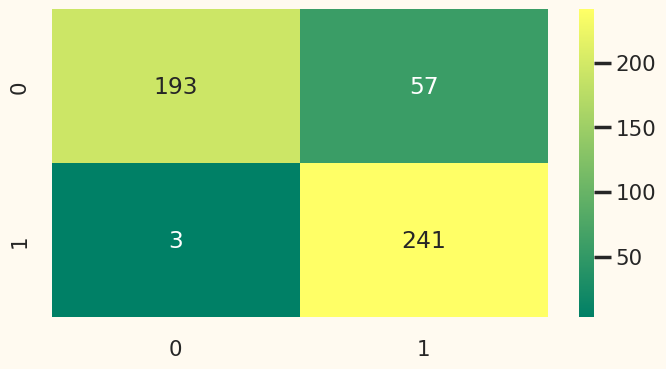


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


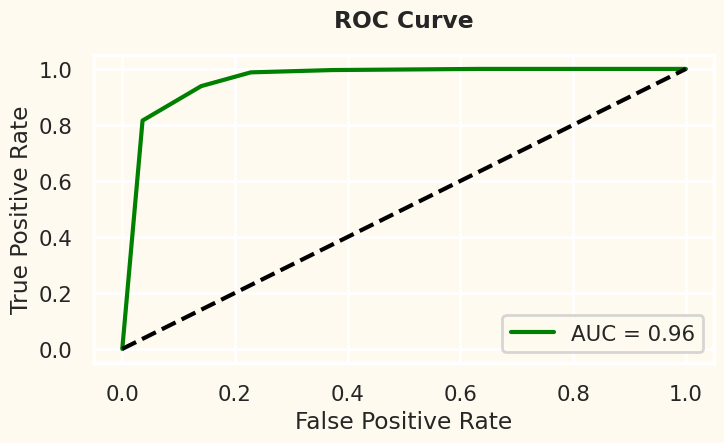

In [83]:
model_prediction(KNeighborsClassifier())

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 3.Naive Bayes</span></b> </div>


------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 76.41987829614605
Accuracy_Score of GaussianNB() model on Testing Data is: 75.50607287449392
Precision Score of GaussianNB() model is: 0.6990291262135923
Recall Score of GaussianNB() model is: 0.8852459016393442
ROC_AUC Score of GaussianNB() model is: 0.8679836065573772
f1 Score of GaussianNB() model is: 0.7811934900542495
kappa Score of GaussianNB() model is: 0.5116104256883733
G_mean Score of GaussianNB() model is: 0.7566229508196721

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       250
           1       0.70      0.89      0.78       244

    accuracy                           0.76       494
   macro avg       0.77      0.76      0.75       494
weighted avg       0.77      0.76 

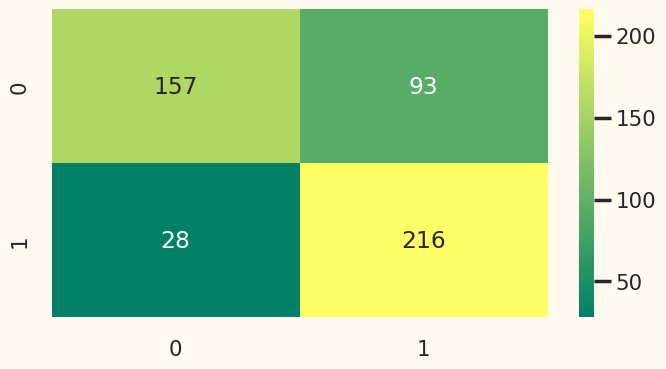


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


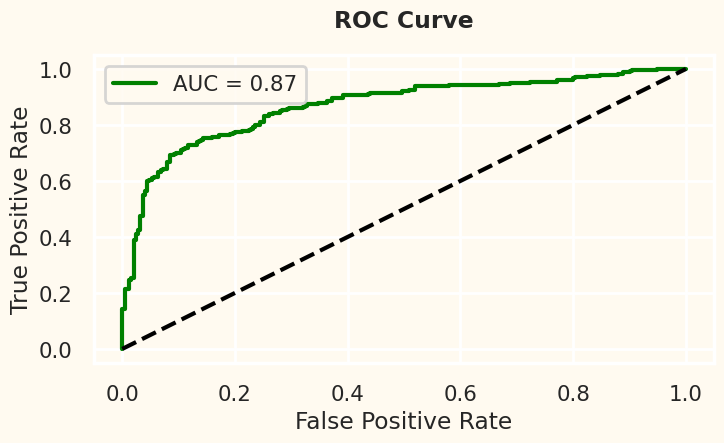

In [84]:
model_prediction(GaussianNB())


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> Model Building for Unscaled Data</span></b> </div>

In [85]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f = f1_score(y_test,x_test_pred)
    g = cohen_kappa_score(y_test, x_test_pred)
    h = balanced_accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>4.Decision Tree</span></b> </div>



------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 86.23481781376519
Precision Score of DecisionTreeClassifier() model is: 0.8464566929133859
Recall Score of DecisionTreeClassifier() model is: 0.8811475409836066
AUC Score of DecisionTreeClassifier() model is: 0.8625737704918033

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       250
           1       0.85      0.88      0.86       244

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494


------------------------------------------------------------------------
Confusion Matrix o

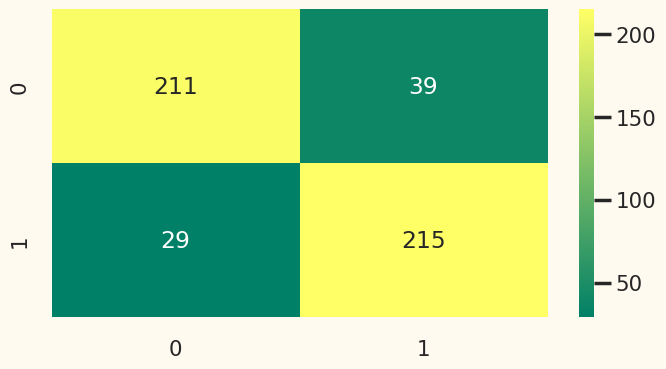


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


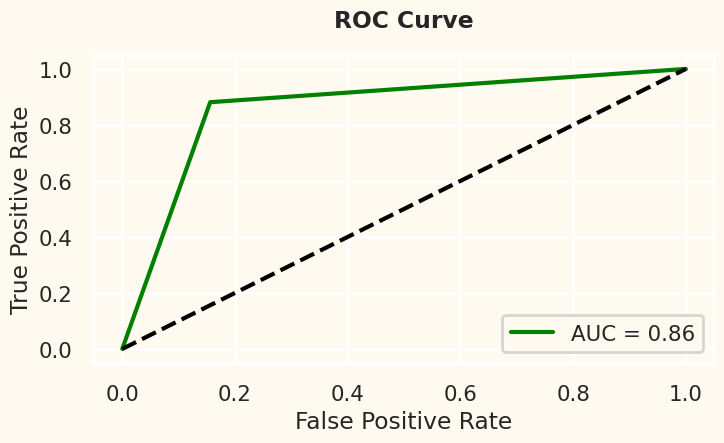

In [86]:
model_prediction(DecisionTreeClassifier())

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'> 5. Random Forest</span></b> </div>



------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 92.51012145748987
Precision Score of RandomForestClassifier() model is: 0.9683257918552036
Recall Score of RandomForestClassifier() model is: 0.8770491803278688
AUC Score of RandomForestClassifier() model is: 0.975860655737705

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       250
           1       0.97      0.88      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.93      0.92       494


------------------------------------------------------------------------
Confusion Matrix of

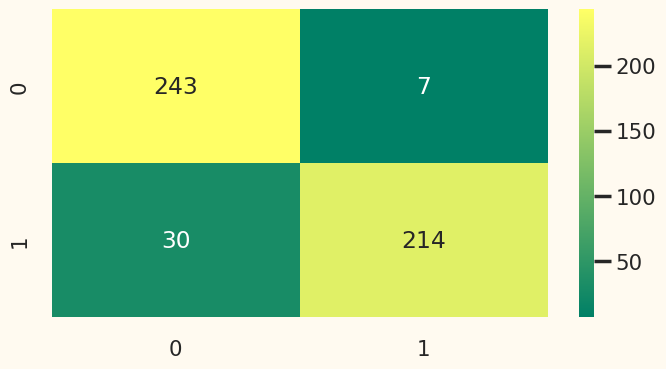


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


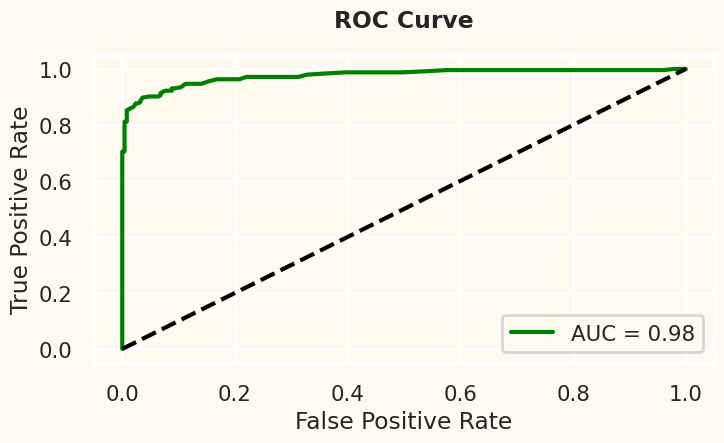

In [87]:
model_prediction(RandomForestClassifier())

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>6.Ada Boost </span></b> </div>



------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier() model on Training Data is: 93.05273833671399
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 90.48582995951418
Precision Score of AdaBoostClassifier() model is: 0.9227467811158798
Recall Score of AdaBoostClassifier() model is: 0.8811475409836066
AUC Score of AdaBoostClassifier() model is: 0.9545245901639344

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       250
           1       0.92      0.88      0.90       244

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494


------------------------------------------------------------------------
Confusion Matrix of AdaBoostCl

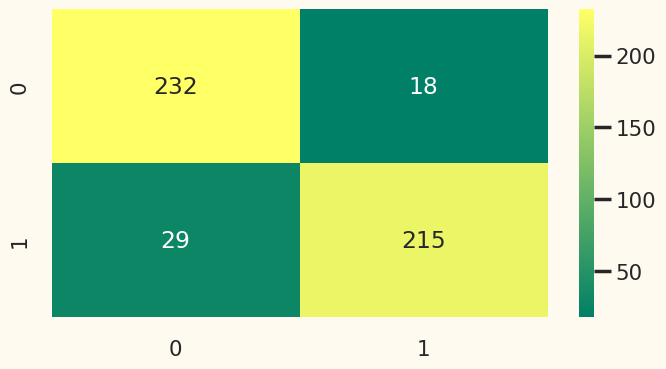


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier() model is:


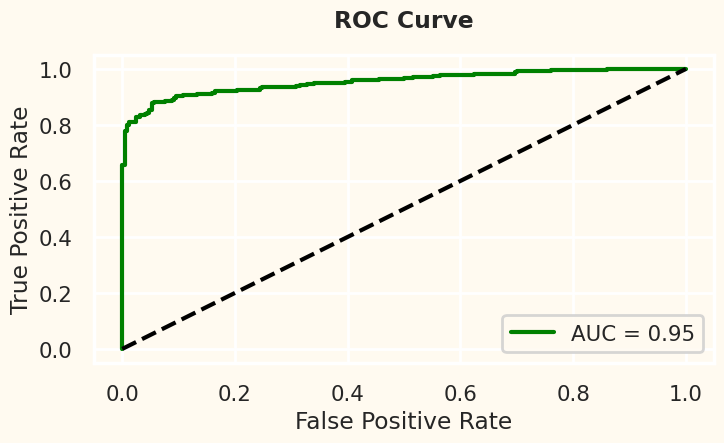

In [88]:
model_prediction(AdaBoostClassifier())

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>7. Gradient Boosting</span></b> </div>



------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 96.55172413793103
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 92.3076923076923
Precision Score of GradientBoostingClassifier() model is: 0.9598214285714286
Recall Score of GradientBoostingClassifier() model is: 0.8811475409836066
AUC Score of GradientBoostingClassifier() model is: 0.9650655737704921

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       250
           1       0.96      0.88      0.92       244

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494


--------------------------------------------------------

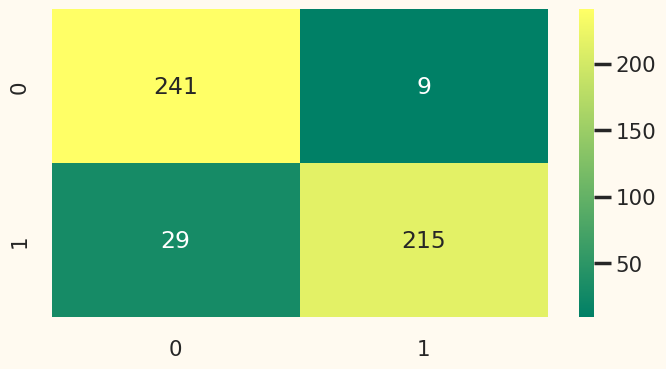


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


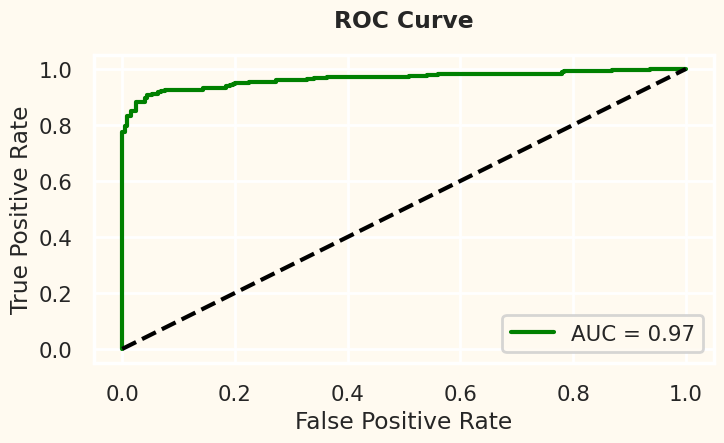

In [89]:
model_prediction(GradientBoostingClassifier())

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>8. XG Boost</span></b> </div>



------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

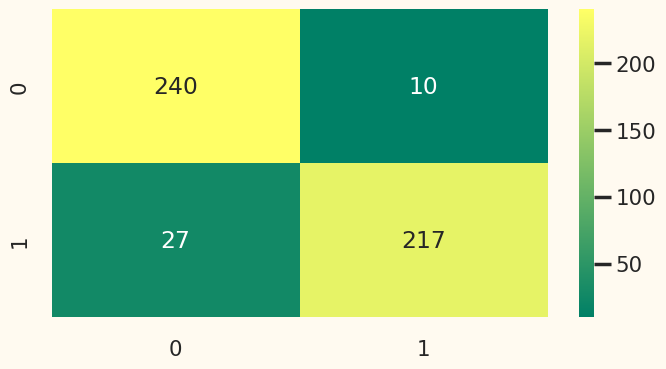


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


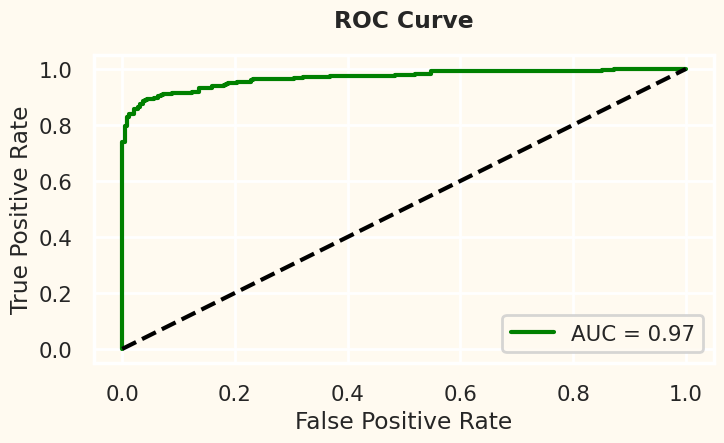

In [90]:
model_prediction(XGBClassifier())

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/579216/pexels-photo-579216.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>9.CatBoost</span></b> </div>


Learning rate set to 0.013768
0:	learn: 0.6816183	total: 58.5ms	remaining: 58.4s
1:	learn: 0.6690812	total: 62.9ms	remaining: 31.4s
2:	learn: 0.6576378	total: 67.6ms	remaining: 22.5s
3:	learn: 0.6457112	total: 72.1ms	remaining: 17.9s
4:	learn: 0.6354624	total: 76.7ms	remaining: 15.3s
5:	learn: 0.6236327	total: 81ms	remaining: 13.4s
6:	learn: 0.6160436	total: 85.4ms	remaining: 12.1s
7:	learn: 0.6069655	total: 90.5ms	remaining: 11.2s
8:	learn: 0.5974380	total: 95.1ms	remaining: 10.5s
9:	learn: 0.5891336	total: 99.4ms	remaining: 9.84s
10:	learn: 0.5794377	total: 104ms	remaining: 9.33s
11:	learn: 0.5718708	total: 108ms	remaining: 8.9s
12:	learn: 0.5641132	total: 112ms	remaining: 8.53s
13:	learn: 0.5566910	total: 117ms	remaining: 8.21s
14:	learn: 0.5475084	total: 121ms	remaining: 7.93s
15:	learn: 0.5388096	total: 125ms	remaining: 7.68s
16:	learn: 0.5323129	total: 129ms	remaining: 7.46s
17:	learn: 0.5257183	total: 133ms	remaining: 7.27s
18:	learn: 0.5185924	total: 138ms	remaining: 7.11s
19:	

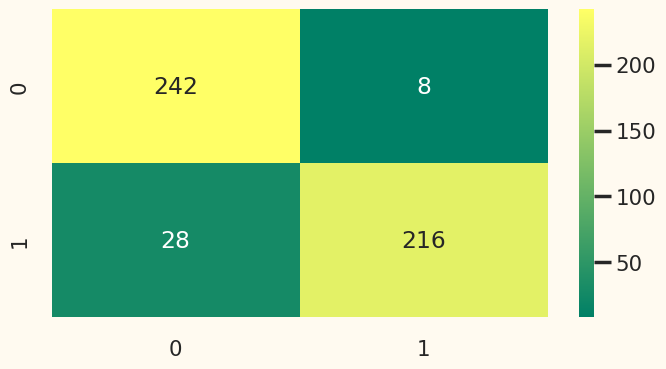


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x7cfc1118ef20> model is:


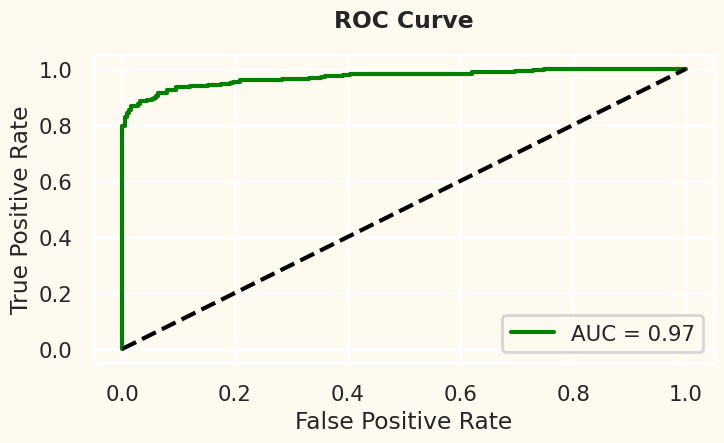

In [91]:
model_prediction(CatBoostClassifier())

***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you found this notebook to be useful and learnt new things, I'd greatly appreciate any upvotes! Your support will encourage me to regularly make projects and improve myself  :-)
   </span>
</div>

<br>

<br>


<div style="text-align: center;">
   <span style="font-size: 1.6em; font-weight: bold;font-family: Arial;"><a href="***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you found this notebook to be useful and learnt new things, I'd greatly appreciate any upvotes! Your support will encourage me to regularly make projects and improve myself  :-)
   </span>
</div>

<br>

<br>


<div style="text-align: center;">
   <span style="font-size: 1.6em; font-weight: bold;font-family: Arial;"><a 
  href="https://www.kaggle.com/shwetapandey01">@shweta_pandey01</a></span>
</div>       
       